# Input analysis of Miller Pain Treatment Center

## Pre-processing the dataset

We will start by pre-processing the dataset to make it easy to use for further analysis. And we start by importing the necessary modules. 

In [1]:
#Necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
from sklearn.impute import SimpleImputer
import numpy as np
import statistics
import warnings
from numpy import sqrt
warnings.filterwarnings("ignore")

We will now import the datasets we will be using in this assignment. 

### df1

df1 represents sample activity times (in minutes) for selected steps common to private practice and AMC.

In [2]:
#Starts to load the first Excel sheet. Can see column 6 is missing 
#data and we will therefore delete this as it do not provide information
df1 = pd.read_excel("MillerPainTreatmentCenterData.xlsx", sheet_name = "Exhibit1")
df1.head()

,Record,Registration,Vitals,Physicians Assistant,Check Out,Unnamed: 5
0,1,9.0,3.0,15.0,1.0,NaN
1,2,4.0,2.0,26.0,5.0,NaN
2,3,9.0,3.0,47.0,4.0,NaN
3,4,8.0,3.0,24.0,10.0,NaN
4,5,4.0,4.0,56.0,9.0,NaN


In [3]:
del df1["Unnamed: 5"]
df1.head()

,Record,Registration,Vitals,Physicians Assistant,Check Out
0,1,9.0,3.0,15.0,1.0
1,2,4.0,2.0,26.0,5.0
2,3,9.0,3.0,47.0,4.0
3,4,8.0,3.0,24.0,10.0
4,5,4.0,4.0,56.0,9.0


In [4]:
#Filling in NaN with the mean value. Could alternatively used median or dropped these values all together.
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(df1.iloc[:, 1:5])
df1.iloc[:, 1:5] = imputer.transform(df1.iloc[:, 1:5])

df1.tail()

,Record,Registration,Vitals,Physicians Assistant,Check Out
94,95,1.0,3.0,34.000000,5.00000
95,96,2.0,3.0,16.000000,6.00000
96,97,4.0,3.0,7.000000,4.00000
97,98,6.0,3.0,21.000000,6.00000
98,99,3.0,5.0,22.622449,4.72449


In [5]:
#Will now make sure that all minutes are rounded to the closest integer. 
df1 = round(df1)

df1.tail()

,Record,Registration,Vitals,Physicians Assistant,Check Out
94,95,1.0,3.0,34.0,5.0
95,96,2.0,3.0,16.0,6.0
96,97,4.0,3.0,7.0,4.0
97,98,6.0,3.0,21.0,6.0
98,99,3.0,5.0,23.0,5.0


In [6]:
df1.astype(float)

,Record,Registration,Vitals,Physicians Assistant,Check Out
0,1.0,9.0,3.0,15.0,1.0
1,2.0,4.0,2.0,26.0,5.0
2,3.0,9.0,3.0,47.0,4.0
3,4.0,8.0,3.0,24.0,10.0
4,5.0,4.0,4.0,56.0,9.0
...,...,...,...,...,...
94,95.0,1.0,3.0,34.0,5.0
95,96.0,2.0,3.0,16.0,6.0
96,97.0,4.0,3.0,7.0,4.0
97,98.0,6.0,3.0,21.0,6.0


### df2

df2 represents sample activity times (in minutes) for steps involving attending in private practice.

In [7]:
#Starts to load the second Excel sheet. Can see column 1 is missing 
#data and we will therefore delete this as it do not provide information
df2 = pd.read_excel("MillerPainTreatmentCenterData.xlsx", sheet_name = "Exhibit3")
df2.head()

,Unnamed: 0,Record,Attending Time New Patients Private Practice,Attending Time Return Patients Private Practice
0,NaN,1,12.0,15.0
1,NaN,2,27.0,14.0
2,NaN,3,16.0,15.0
3,NaN,4,15.0,30.0
4,NaN,5,18.0,16.0


In [8]:
del df2["Unnamed: 0"]
df2.head()

,Record,Attending Time New Patients Private Practice,Attending Time Return Patients Private Practice
0,1,12.0,15.0
1,2,27.0,14.0
2,3,16.0,15.0
3,4,15.0,30.0
4,5,18.0,16.0


In [9]:
#Filling in NaN with the mean value. Could alternatively used median or dropped these values all together.
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(df2.iloc[:, 1:3])
df2.iloc[:, 1:3] = imputer.transform(df2.iloc[:, 1:3])

In [10]:
#Will now make sure that all minutes are rounded to the closest integer. 
df2 = round(df2)

In [11]:
df2.astype(float)

,Record,Attending Time New Patients Private Practice,Attending Time Return Patients Private Practice
0,1.0,12.0,15.0
1,2.0,27.0,14.0
2,3.0,16.0,15.0
3,4.0,15.0,30.0
4,5.0,18.0,16.0
...,...,...,...
94,95.0,25.0,22.0
95,96.0,12.0,4.0
96,97.0,35.0,16.0
97,98.0,25.0,4.0


### df3

df3 represents a sample of patient arrival times minus appointment times before and 12 months after policy change.

In [12]:
#Starts to load the third Excel sheet. 
df3 = pd.read_excel("MillerPainTreatmentCenterData.xlsx", sheet_name = "Exhibit4")
df3.head()

,Record,Appointment Time Minus Arrival Time Before Policy Change,Appointment Time Minus Arrival Time After Policy Change
0,1,0,-21.0
1,2,-13,-23.0
2,3,-40,-15.0
3,4,-20,-38.0
4,5,-10,-23.0


In [13]:
#Will now make sure that all minutes are rounded to the closest integer. 
df3 = round(df3)

In [14]:
df3.astype(float)

,Record,Appointment Time Minus Arrival Time Before Policy Change,Appointment Time Minus Arrival Time After Policy Change
0,1.0,0.0,-21.0
1,2.0,-13.0,-23.0
2,3.0,-40.0,-15.0
3,4.0,-20.0,-38.0
4,5.0,-10.0,-23.0
...,...,...,...
95,96.0,-40.0,NaN
96,97.0,-18.0,NaN
97,98.0,-10.0,NaN
98,99.0,-15.0,NaN


### df4

df4 represents sample activity times (in minutes) for steps involving resident in AMC for new patients.

In [15]:
#Starts to load the third Excel sheet. 
df4 = pd.read_excel("MillerPainTreatmentCenterData.xlsx", sheet_name = "Exhibit6")
df4.head()

,Record,Resident Review,Resident & Patient,Teach,Resident & Attending
0,1,1.0,27.0,3.0,14.0
1,2,5.0,17.0,8.0,5.0
2,3,7.0,9.0,3.0,7.0
3,4,0.0,17.0,2.0,1.0
4,5,6.0,27.0,7.0,9.0


In [16]:
#Filling in NaN with the mean value. Could alternatively used median or dropped these values all together.
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(df4.iloc[:, 1:5])
df4.iloc[:, 1:5] = imputer.transform(df4.iloc[:, 1:5])

In [17]:
#Will now make sure that all minutes are rounded to the closest integer.
df4 = round(df4)

In [18]:
df4.astype(float)

,Record,Resident Review,Resident & Patient,Teach,Resident & Attending
0,1.0,1.0,27.0,3.0,14.0
1,2.0,5.0,17.0,8.0,5.0
2,3.0,7.0,9.0,3.0,7.0
3,4.0,0.0,17.0,2.0,1.0
4,5.0,6.0,27.0,7.0,9.0
...,...,...,...,...,...
86,87.0,35.0,23.0,4.0,20.0
87,88.0,4.0,8.0,8.0,20.0
88,89.0,3.0,13.0,8.0,20.0
89,90.0,3.0,29.0,8.0,6.0


### df5

df5 represents sample activity times (in minutes) for steps involving resident in AMC for retun patients.

In [19]:
#Starts to load the third Excel sheet. 
df5 = pd.read_excel("MillerPainTreatmentCenterData.xlsx", sheet_name = "Exhibit7")
df5.head()

,Record,Resident Review,Resident & Patient,Teach,Resident & Attending
0,1,1.0,30.0,15,11.0
1,2,11.0,19.0,2,11.0
2,3,17.0,39.0,2,57.0
3,4,9.0,23.0,0,10.0
4,5,4.0,17.0,5,3.0


In [20]:
#Filling in NaN with the mean value. Could alternatively used median or dropped these values all together.
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(df5.iloc[:, 1:5])
df5.iloc[:, 1:5] = imputer.transform(df5.iloc[:, 1:5])

In [21]:
#Will now make sure that all minutes are rounded to the closest integer. 
df5 = round(df5)

In [22]:
df5.astype(float)

,Record,Resident Review,Resident & Patient,Teach,Resident & Attending
0,1.0,1.0,30.0,15.0,11.0
1,2.0,11.0,19.0,2.0,11.0
2,3.0,17.0,39.0,2.0,57.0
3,4.0,9.0,23.0,0.0,10.0
4,5.0,4.0,17.0,5.0,3.0
...,...,...,...,...,...
95,96.0,5.0,25.0,4.0,5.0
96,97.0,5.0,8.0,3.0,9.0
97,98.0,2.0,8.0,10.0,3.0
98,99.0,2.0,3.0,6.0,7.0


# Histograms

### df1 - sample activity times (in minutes) for selected steps common to private practice and AMC

We will now make histograms over the data to better fit a distribution model. For df1, we have Registration, Vitals, Physicians Assistant, and Check Out. 

#### Registration

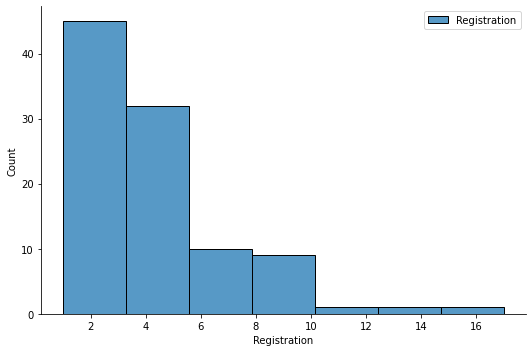

In [23]:
#Create histogram
hist = sns.displot(data=df1, x="Registration", kind="hist", bins = 7, aspect = 1.5, label = "Registration")
plt.legend()
plt.show()

In [24]:
registration = df1['Registration'].values

#### Vitals

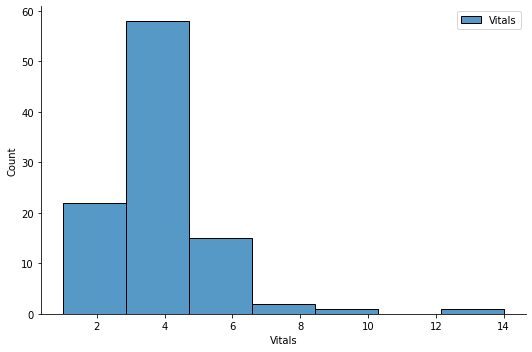

In [25]:
#Create histogram
hist = sns.displot(data=df1, x="Vitals", kind="hist", bins = 7, aspect = 1.5, label = "Vitals")
plt.legend()
plt.show()

In [26]:
#Extract data
vitals = df1['Vitals'].values

#### Physicians Assistant

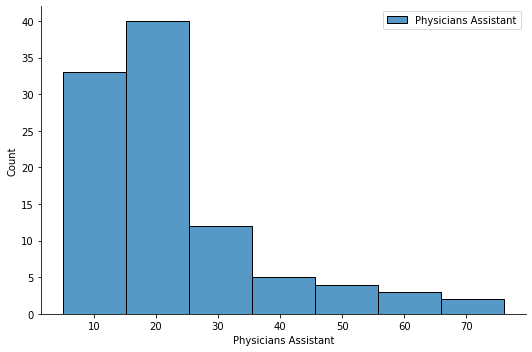

In [27]:
#Create histogram
hist = sns.displot(data=df1, x="Physicians Assistant", kind="hist", bins = 7, aspect = 1.5, label = "Physicians Assistant")
plt.legend()
plt.show()

In [28]:
#Extract data
pa = df1['Physicians Assistant'].values

#### Check Out

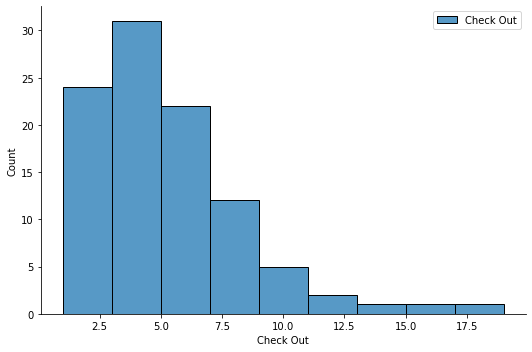

In [29]:
#Create histogram
hist = sns.displot(data=df1, x="Check Out", kind="hist", bins = 9, aspect = 1.5, label = "Check Out")
plt.legend()
plt.show()

In [30]:
#Extract data
check_out = df1['Check Out'].values

### df2 - sample activity times (in minutes) for steps involving attending in private practice

#### Attending Time New Patients Private Practice

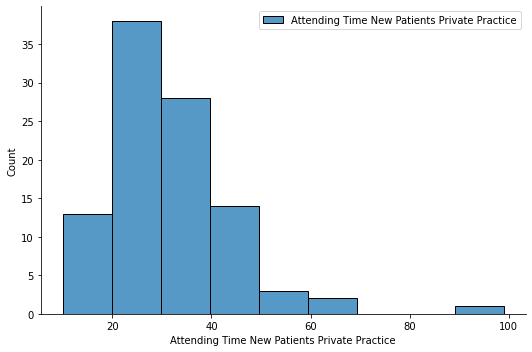

In [31]:
#Create histogram
hist = sns.displot(data=df2, x="Attending Time New Patients Private Practice", kind="hist", bins = 9, aspect = 1.5, label = "Attending Time New Patients Private Practice")
plt.legend()
plt.show()

In [32]:
att_new_pp = df2['Attending Time New Patients Private Practice'].values

#### Attending Time Return Patients Private Practice

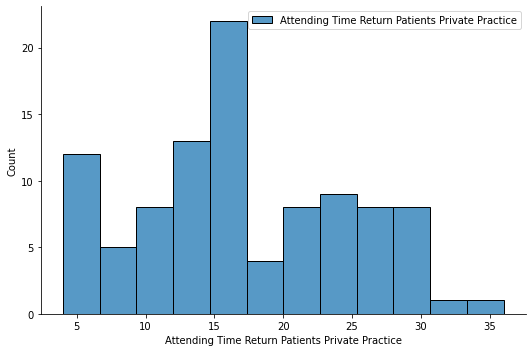

In [33]:
#Create histogram
hist = sns.displot(data=df2, x="Attending Time Return Patients Private Practice", kind="hist", bins = 12, aspect = 1.5, label = "Attending Time Return Patients Private Practice")
plt.legend()
plt.show()

In [34]:
att_return_pp = df2['Attending Time Return Patients Private Practice'].values

### df3 - patient arrival times minus appointment times before and 12 months after policy change

#### Appointment Time Minus Arrival Time Before Policy Change

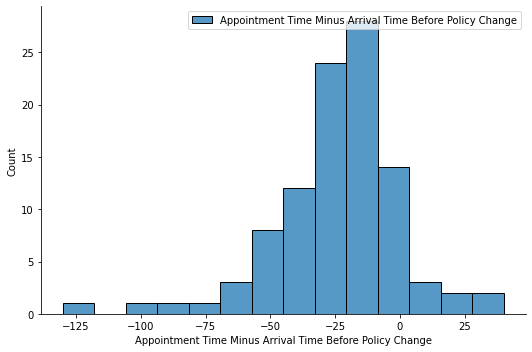

In [35]:
#Create histogram
hist = sns.displot(data=df3, x="Appointment Time Minus Arrival Time Before Policy Change", kind="hist", bins = 14, aspect = 1.5, label = "Appointment Time Minus Arrival Time Before Policy Change")
plt.legend()
plt.show()

In [36]:
before_policy = df3['Appointment Time Minus Arrival Time Before Policy Change'].values

#### Appointment Time Minus Arrival Time After Policy Change

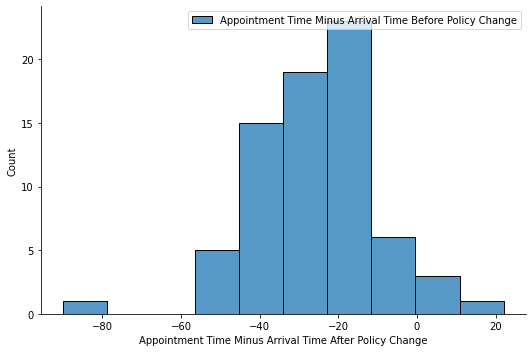

In [37]:
#Create histogram
hist = sns.displot(data=df3, x="Appointment Time Minus Arrival Time After Policy Change", kind="hist", bins = 10, aspect = 1.5, label = "Appointment Time Minus Arrival Time Before Policy Change")
plt.legend()
plt.show()

In [38]:
after_policy = df3['Appointment Time Minus Arrival Time After Policy Change'].values

### df4 - sample activity times (in minutes) for steps involving resident in AMC for new patients

#### Resident Review

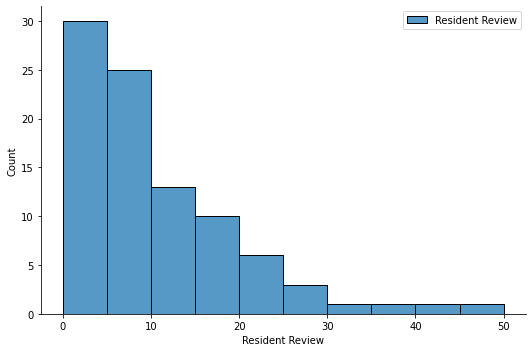

In [39]:
#Create histogram
hist = sns.displot(data=df4, x="Resident Review", kind="hist", bins = 10, aspect = 1.5, label = "Resident Review")
plt.legend()
plt.show()

In [40]:
resident_review = df4["Resident Review"].values

#### Resident & Patient

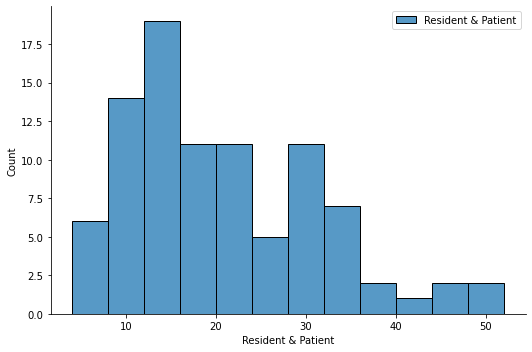

In [41]:
#Create histogram
hist = sns.displot(data=df4, x="Resident & Patient", kind="hist", bins = 12, aspect = 1.5, label = "Resident & Patient")
plt.legend()
plt.show()

In [42]:
res_pat = df4["Resident & Patient"].values

#### Teach

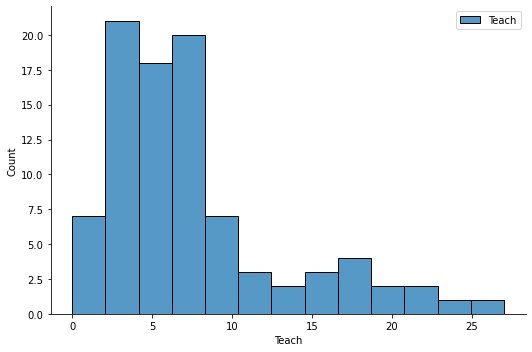

In [43]:
#Create histogram
hist = sns.displot(data=df4, x="Teach", kind="hist", bins = 13, aspect = 1.5, label = "Teach")
plt.legend()
plt.show()

In [44]:
teach = df4["Teach"].values

#### Resident & Attending

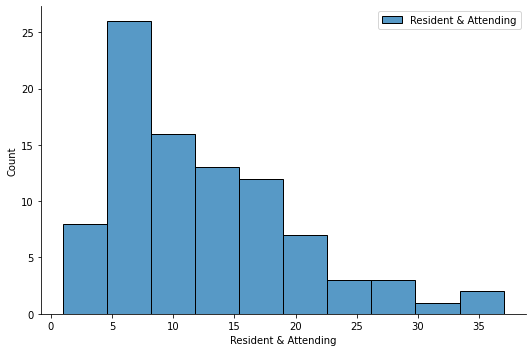

In [45]:
#Create histogram
hist = sns.displot(data=df4, x="Resident & Attending", kind="hist", bins = 10, aspect = 1.5, label = "Resident & Attending")
plt.legend()
plt.show()

In [46]:
res_att = df4["Resident & Attending"].values

## df5 - sample activity times (in minutes) for steps involving resident in AMC for return patients

#### Resident Review

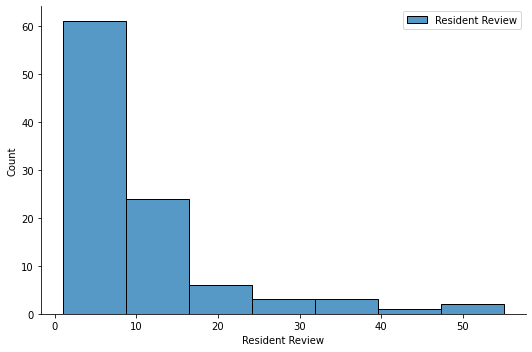

In [47]:
#Create histogram
hist = sns.displot(data=df5, x="Resident Review", kind="hist", bins = 7, aspect = 1.5, label = "Resident Review")
plt.legend()
plt.show()

In [48]:
resident_review_ret = df5["Resident Review"].values

#### Resident & Patient

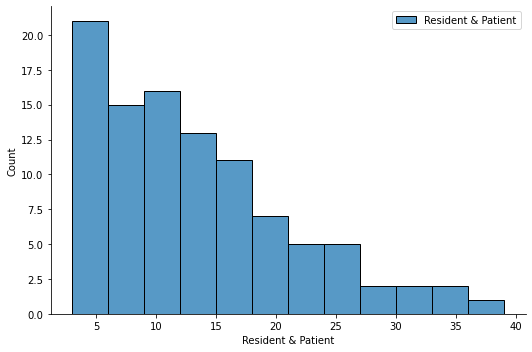

In [49]:
#Create histogram
hist = sns.displot(data=df5, x="Resident & Patient", kind="hist", bins = 12, aspect = 1.5, label = "Resident & Patient")
plt.legend()
plt.show()

In [50]:
res_pat_ret = df5["Resident & Patient"].values

#### Teach

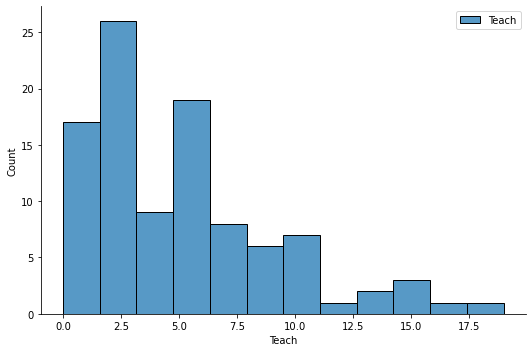

In [51]:
#Create histogram
hist = sns.displot(data=df5, x="Teach", kind="hist", bins = 12, aspect = 1.5, label = "Teach")
plt.legend()
plt.show()

In [52]:
teach_ret = df5["Teach"].values

#### Resident & Attending

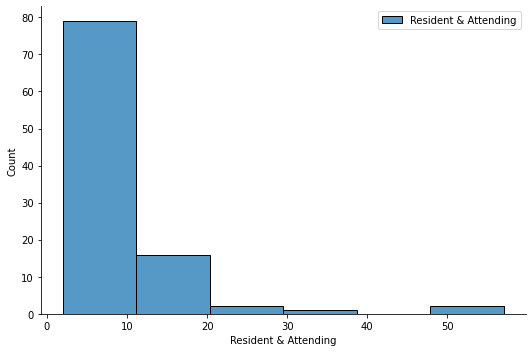

In [53]:
#Create histogram
hist = sns.displot(data=df5, x="Resident & Attending", kind="hist", bins = 6, aspect = 1.5, label = "Resident & Attending")
plt.legend()
plt.show()

In [54]:
res_att_ret = df5["Resident & Attending"].values

# Distributions

### df1 - sample activity times (in minutes) for selected steps common to private practice and AMC

#### Registration

         sumsquare_error         aic         bic  kl_div
lognorm         4.640626  773.552806 -289.181433     inf
fisk            4.645294  765.801219 -289.081894     inf
erlang          4.648492  770.246431 -289.013765     inf
gamma           4.648492  770.251984 -289.013764     inf
beta            4.651050  771.895283 -284.364171     inf


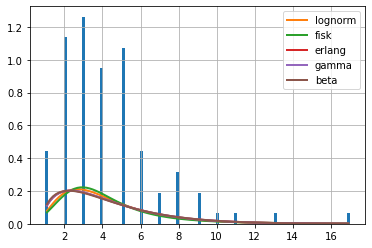

In [55]:
#Fit distribution
fit_dist_reg = Fitter(registration, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_reg.fit()
print(fit_dist_reg.summary())
plt.show()

In [56]:
fit_dist_reg.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.5385179590246557,
  'loc': -0.34179772694843824,
  'scale': 4.048761332128162}}

In [57]:
# Print the parameters
print(fit_dist_reg.fitted_param['lognorm'])
print(fit_dist_reg.fitted_param['fisk'])
print(fit_dist_reg.fitted_param['erlang'])
print(fit_dist_reg.fitted_param['gamma'])
print(fit_dist_reg.fitted_param['beta'])

(0.5385179590246557, -0.34179772694843824, 4.048761332128162)
(3.0067810699034174, -0.07489978152457154, 3.7828329271373784)
(1.7811956843645262, 0.7488761555904437, 2.0124038375524687)
(1.7812047511733897, 0.748863606999249, 2.0123759948267264)
(1.637700903474478, 45.22936028451872, 0.7962586326528851, 101.21588776458789)


In [58]:
lognorm_reg = stats.kstest(registration, 'lognorm', args=(0.5385179590246557, -0.34179772694843824, 4.048761332128162))
loglogistic_reg = stats.kstest(registration, 'fisk', args=(1.2817687960550623, 0.9045073398398338, 3.6903994374475815))
erlang_reg = stats.kstest(registration, 'erlang', args=(1.7811956843645262, 0.7488761555904437, 2.0124038375524687))
gamma_reg = stats.kstest(registration, 'gamma', args=(1.7812047511733897, 0.748863606999249, 2.0123759948267264))
beta_reg = stats.kstest(registration, 'beta', args=(1.637700903474478, 45.22936028451872, 0.7962586326528851, 101.21588776458789))


print(f'Lognormal distribution: {lognorm_reg})')
print(f'Loglogistic: {loglogistic_reg})')
print(f'Erlang distribution: {erlang_reg})')
print(f'Gamma distribution: {gamma_reg})')
print(f'Beta distribution: {beta_reg})')

Lognormal distribution: KstestResult(statistic=0.1082631393982002, pvalue=0.18241015734048832))
Loglogistic: KstestResult(statistic=0.24655171406606546, pvalue=8.716797143110919e-06))
Erlang distribution: KstestResult(statistic=0.12347906091252936, pvalue=0.08964031031571702))
Gamma distribution: KstestResult(statistic=0.12348441745613098, pvalue=0.08961640820927969))
Beta distribution: KstestResult(statistic=0.12625586918096016, pvalue=0.07794476077210225))


Text(0.5, 1.0, 'Lognormal probability plot of registrations')

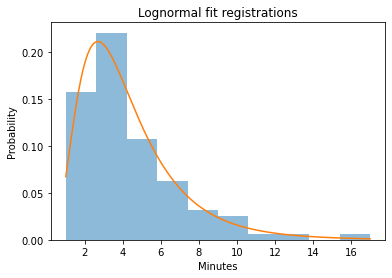

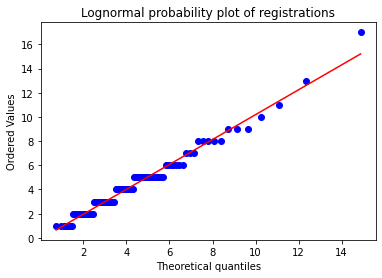

In [59]:
#Fitting the data
shape, loc, scale = stats.lognorm.fit(registration)
fitted = stats.lognorm(shape, loc, scale)
plt.hist(registration, density=True, alpha=0.5)
x = np.linspace(registration.min(), registration.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Lognormal fit registrations")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(registration, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Lognormal probability plot of registrations")

#### Vitals

         sumsquare_error         aic         bic  kl_div
fisk           12.965247  856.606413 -187.466530     inf
lognorm        13.010436  891.850517 -187.122079     inf
erlang         13.036039  941.723013 -186.927445     inf
gamma          13.036041  941.721854 -186.927436     inf
beta           13.051992  908.400597 -182.211250     inf


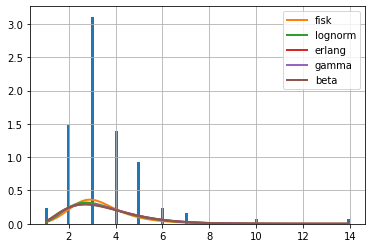

In [60]:
#Fit distribution
fit_dist_vit = Fitter(vitals, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_vit.fit()
print(fit_dist_vit.summary())
plt.show()

In [61]:
fit_dist_vit.get_best(method = 'sumsquare_error')

{'fisk': {'c': 4.440911299494791,
  'loc': -0.011404002465611802,
  'scale': 3.2203618294227185}}

In [62]:
print(fit_dist_vit.fitted_param['fisk'])
print(fit_dist_vit.fitted_param['lognorm'])
print(fit_dist_vit.fitted_param['erlang'])
print(fit_dist_vit.fitted_param['gamma'])
print(fit_dist_vit.fitted_param['beta'])

(4.440911299494791, -0.011404002465611802, 3.2203618294227185)
(0.4020175027485347, -0.14192119752850807, 3.368672518190296)
(3.751391558061699, 0.5673806618256916, 0.7884736138376485)
(3.7513592292833784, 0.567384719046707, 0.7884780536396723)
(3.353020714529657, 3934148872466.942, 0.6451639855141116, 3402865835450.368)


In [63]:
#KS test
loglogistic_vit = stats.kstest(vitals, 'fisk', args=(4.440911299494791, -0.011404002465611802, 3.2203618294227185))
lognorm_vit = stats.kstest(vitals, 'lognorm', args=(0.4020175027485347, -0.14192119752850807, 3.368672518190296))
erlang_vit = stats.kstest(vitals, 'erlang', args=(3.751391558061699, 0.5673806618256916, 0.7884736138376485))
gamma_vit = stats.kstest(vitals, 'gamma', args=(3.7513592292833784, 0.567384719046707, 0.7884780536396723))
beta_vit = stats.kstest(vitals, 'beta', args=(3.353020714529657, 3934148872466.942, 0.6451639855141116, 3402865835450.368))

print(f'Loglogistic distribution: {loglogistic_vit})')
print(f'Lognormal distribution: {lognorm_vit})')
print(f'Erlang distribution: {erlang_vit})')
print(f'Gamma distribution: {gamma_vit})')
print(f'Weibull distribution: {beta_vit})')

Loglogistic distribution: KstestResult(statistic=0.20384166629555328, pvalue=0.00043929520402095803))
Lognormal distribution: KstestResult(statistic=0.2089712558464244, pvalue=0.00028574724390880975))
Erlang distribution: KstestResult(statistic=0.20202159243066248, pvalue=0.0005103609060399798))
Gamma distribution: KstestResult(statistic=0.2020234424137926, pvalue=0.0005102834864461988))
Weibull distribution: KstestResult(statistic=0.20536071588357047, pvalue=0.00038720867686403693))


Text(0.5, 1.0, 'Loglogistic probability plot of registrations')

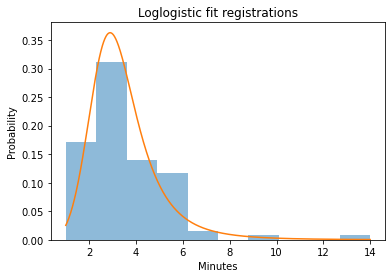

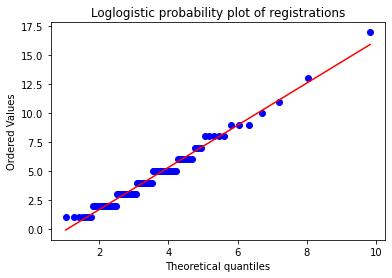

In [64]:
#Fitting the data
c, loc, scale = stats.fisk.fit(vitals)
fitted = stats.fisk(c, loc, scale)
plt.hist(vitals, density=True, alpha=0.5)
x = np.linspace(vitals.min(), vitals.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Loglogistic fit registrations")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(registration, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Loglogistic probability plot of registrations")

#### Physicians Assistant

         sumsquare_error          aic         bic  kl_div
fisk            0.031225  1034.034621 -784.317542     inf
lognorm         0.031904  1023.768344 -782.187767     inf
gamma           0.032900  1022.982096 -779.145591     inf
erlang          0.032900  1022.981174 -779.145492     inf
beta            0.032942  1023.399741 -774.425170     inf


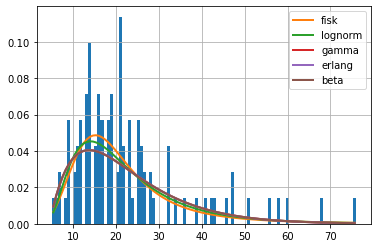

In [65]:
#Fit distribution
fit_dist_pa = Fitter(pa, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_pa.fit()
print(fit_dist_pa.summary())
plt.show()

In [66]:
fit_dist_pa.get_best(method = 'sumsquare_error')

{'fisk': {'c': 2.7860082154208743,
  'loc': 2.702096127818054,
  'scale': 16.319375665901045}}

In [67]:
# Print the parameters
print(fit_dist_pa.fitted_param['fisk'])
print(fit_dist_pa.fitted_param['lognorm'])
print(fit_dist_pa.fitted_param['gamma'])
print(fit_dist_pa.fitted_param['erlang'])
print(fit_dist_pa.fitted_param['beta'])

(2.7860082154208743, 2.702096127818054, 16.319375665901045)
(0.587892170505449, 1.448947227139553, 17.791808027743237)
(2.051957933188832, 4.404186363755601, 8.88034048896386)
(2.051951095654511, 4.404159923681451, 8.880386029882718)
(2.0322373657395447, 257192267660.55048, 4.425112755907271, 2307233018368.8296)


In [68]:
#KS test
loglogistic_pa = stats.kstest(pa, 'fisk', args=(2.7860082154208743, 2.702096127818054, 16.319375665901045))
lognorm_pa = stats.kstest(pa, 'lognorm', args=(0.587892170505449, 1.448947227139553, 17.791808027743237))
gamma_pa = stats.kstest(pa, 'gamma', args=(2.051957933188832, 4.404186363755601, 8.88034048896386))
erlang_pa = stats.kstest(pa, 'erlang', args=(2.051951095654511, 4.404159923681451, 8.880386029882718))
beta_pa = stats.kstest(pa, 'beta', args=(2.0322373657395447, 257192267660.55048, 4.425112755907271, 2307233018368.8296))

print(f'Loglogistic distribution: {loglogistic_pa})')
print(f'Lognormal distribution: {lognorm_pa})')
print(f'Gamma distribution: {gamma_pa})')
print(f'Erlang distribution: {erlang_pa})')
print(f'Beta distribution: {beta_pa})')

Loglogistic distribution: KstestResult(statistic=0.04368127256731047, pvalue=0.9874368758793604))
Lognormal distribution: KstestResult(statistic=0.05960933104104327, pvalue=0.8523795665605303))
Gamma distribution: KstestResult(statistic=0.08292198994660671, pvalue=0.47867397400020373))
Erlang distribution: KstestResult(statistic=0.0829220616977332, pvalue=0.47867287170805106))
Beta distribution: KstestResult(statistic=0.08342797493230791, pvalue=0.47093163046891795))


Text(0.5, 1.0, 'Loglogistic probability plot of physicians assistant')

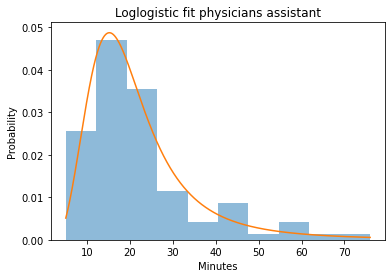

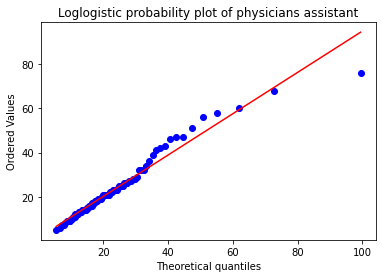

In [69]:
#Fitting the data
shape, loc, scale = stats.fisk.fit(pa)
fitted = stats.fisk(shape, loc, scale)
plt.hist(pa, density=True, alpha=0.5)
x = np.linspace(pa.min(), pa.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Loglogistic fit physicians assistant")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(pa, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Loglogistic probability plot of physicians assistant")

#### Check Out

             sumsquare_error         aic         bic  kl_div
beta                2.866428  737.740565 -332.282779     inf
weibull_min         2.909362  756.213940 -335.406057     inf
expon               2.925798  750.062188 -339.443482     inf
lognorm             2.965650  774.191931 -333.508975     inf
fisk                2.970009  771.216957 -333.363578     inf


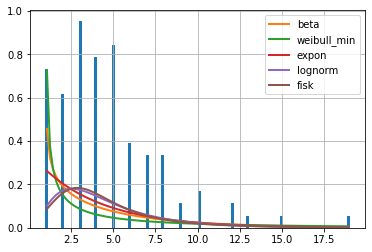

In [70]:
#Fit distribution
fit_dist_co = Fitter(check_out, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_co.fit()
print(fit_dist_co.summary())
plt.show()

In [71]:
fit_dist_co.get_best(method = 'sumsquare_error')

{'beta': {'a': 0.713660556066938,
  'b': 63.40845865755588,
  'loc': 0.9999999999999999,
  'scale': 347.0278726714308}}

In [72]:
# Print the parameters
print(fit_dist_co.fitted_param['beta'])
print(fit_dist_co.fitted_param['weibull_min'])
print(fit_dist_co.fitted_param['expon'])
print(fit_dist_co.fitted_param['lognorm'])
print(fit_dist_co.fitted_param['fisk'])

(0.713660556066938, 63.40845865755588, 0.9999999999999999, 347.0278726714308)
(0.5048417064634799, 0.9999999999999998, 3.8248121806955457)
(1.0, 3.7272727272727275)
(0.5992517770477753, -0.5371618515832648, 4.424689936688642)
(2.7254423826301704, -0.3186393801987124, 4.253532542358507)


In [73]:
# KS test
beta_co = stats.kstest(check_out, 'beta', args=(0.713660556066938, 63.40845865755588, 0.9999999999999999, 347.0278726714308))
weibull_co = stats.kstest(check_out, 'weibull_min', args=(0.5048417064634799, 0.9999999999999998, 3.8248121806955457))
expon_co = stats.kstest(check_out, 'expon', args=(1.0, 3.7272727272727275))
lognorm_co = stats.kstest(check_out, 'lognorm', args=(0.5992517770477753, -0.5371618515832648, 4.424689936688642))
loglogistic_co = stats.kstest(check_out, 'fisk', args=(2.7254423826301704, -0.3186393801987124, 4.253532542358507))

print(f'Beta distribution: {beta_co})')
print(f'Weibull distribution: {weibull_co})')
print(f'Expon distribution: {expon_co})')
print(f'Lognormal distribution: {lognorm_co})')
print(f'Loglogistic distribution: {loglogistic_co})')

Beta distribution: KstestResult(statistic=0.21991995100476042, pvalue=0.0001099675252036046))
Weibull distribution: KstestResult(statistic=0.2712384455168868, pvalue=6.332146498692681e-07))
Expon distribution: KstestResult(statistic=0.17283423190771574, pvalue=0.00468207308399837))
Lognormal distribution: KstestResult(statistic=0.11192978379246954, pvalue=0.15504286720628424))
Loglogistic distribution: KstestResult(statistic=0.09620736369166505, pvalue=0.2991948169098429))


Text(0.5, 1.0, 'Beta probability plot of check out')

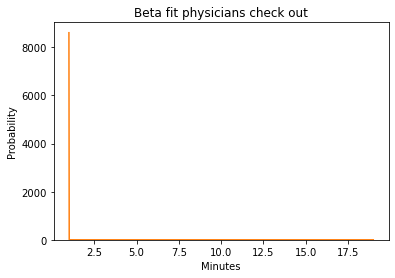

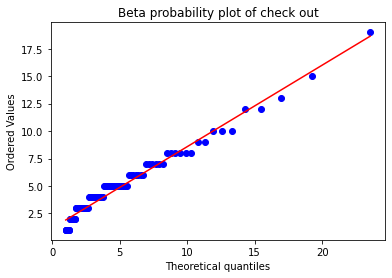

In [74]:
#Fitting the data
a, b, loc, scale = stats.beta.fit(check_out)
fitted = stats.beta(a, b, loc, scale)
plt.hist(check_out, density=True, alpha=0.5)
x = np.linspace(check_out.min(), check_out.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Beta fit physicians check out")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(check_out, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Beta probability plot of check out")

Text(0.5, 1.0, 'Exponential probability plot of check out')

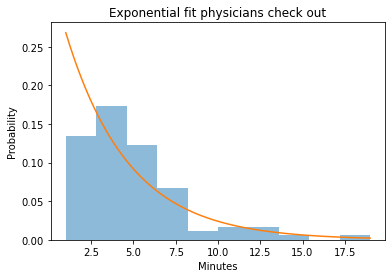

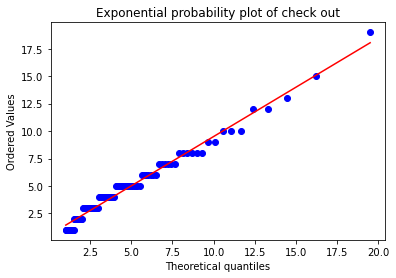

In [75]:
#Fitting the data
loc, scale = stats.expon.fit(check_out)
fitted = stats.expon(loc, scale)
plt.hist(check_out, density=True, alpha=0.5)
x = np.linspace(check_out.min(), check_out.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Exponential fit physicians check out")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(check_out, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Exponential probability plot of check out")

Text(0.5, 1.0, 'Lognormal probability plot of check out')

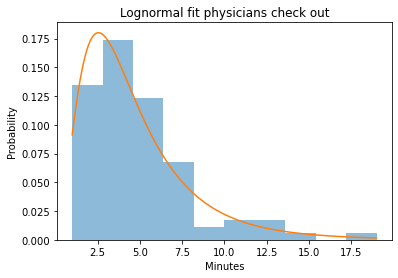

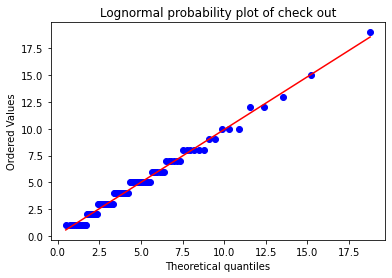

In [76]:
#Fitting the data
shape, loc, scale = stats.lognorm.fit(check_out)
fitted = stats.lognorm(shape, loc, scale)
plt.hist(check_out, density=True, alpha=0.5)
x = np.linspace(check_out.min(), check_out.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Lognormal fit physicians check out")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(check_out, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Lognormal probability plot of check out")

### df2 - sample activity times (in minutes) for steps involving attending in private practice

#### Attending Time New Patients Private Practice

         sumsquare_error          aic         bic  kl_div
fisk            0.031135  1175.916963 -784.604499     inf
lognorm         0.031967  1201.317485 -781.994525     inf
erlang          0.032112  1222.687165 -781.543990     inf
gamma           0.032113  1222.686512 -781.543972     inf
beta            0.032178  1217.398482 -776.748461     inf


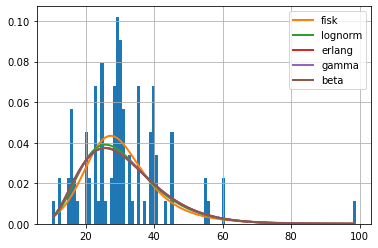

In [77]:
#Fit distribution
fit_dist_att_new_pp = Fitter(att_new_pp, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_att_new_pp.fit()
print(fit_dist_att_new_pp.summary())
plt.show()

In [78]:
fit_dist_att_new_pp.get_best(method = 'sumsquare_error')

{'fisk': {'c': 5.702478969865265,
  'loc': -4.6055869057211005,
  'scale': 33.857358266996386}}

In [79]:
print(fit_dist_att_new_pp.fitted_param['fisk'])
print(fit_dist_att_new_pp.fitted_param['lognorm'])
print(fit_dist_att_new_pp.fitted_param['erlang'])
print(fit_dist_att_new_pp.fitted_param['gamma'])
print(fit_dist_att_new_pp.fitted_param['beta'])

(5.702478969865265, -4.6055869057211005, 33.857358266996386)
(0.3301883217076882, -3.5778658235235197, 32.68159751792322)
(4.852723171623039, 5.197356300242957, 5.310904493959896)
(4.852710251713843, 5.197368902371613, 5.310916161646718)
(4.650045230880449, 2670116798944.059, 5.559155723585979, 14606282061070.828)


In [80]:
#KS test
loglogistic_att_new_pp = stats.kstest(att_new_pp, 'fisk', args=(5.702478969865265, -4.6055869057211005, 33.857358266996386))
lognorm_att_new_pp = stats.kstest(att_new_pp, 'lognorm', args=(0.3301883217076882, -3.5778658235235197, 32.68159751792322))
erlang_att_new_pp = stats.kstest(att_new_pp, 'erlang', args=(4.852723171623039, 5.197356300242957, 5.310904493959896))
gamma_att_new_pp = stats.kstest(att_new_pp, 'gamma', args=(4.852710251713843, 5.197368902371613, 5.310916161646718))
beta_att_new_pp = stats.kstest(att_new_pp, 'beta', args=(4.650045230880449, 2670116798944.059, 5.559155723585979, 14606282061070.828))

print(f'Loglogistic distribution: {loglogistic_att_new_pp})')
print(f'Lognormal distribution: {lognorm_att_new_pp})')
print(f'Erlang distribution: {erlang_att_new_pp})')
print(f'Gamma distribution: {gamma_att_new_pp})')
print(f'Beta distribution: {beta_att_new_pp})')

Loglogistic distribution: KstestResult(statistic=0.0828622904606684, pvalue=0.4795915473787691))
Lognormal distribution: KstestResult(statistic=0.09492891455119151, pvalue=0.3141583819009648))
Erlang distribution: KstestResult(statistic=0.092235939113058, pvalue=0.34733668614581564))
Gamma distribution: KstestResult(statistic=0.0922360874705277, pvalue=0.34733479664367645))
Beta distribution: KstestResult(statistic=0.09333794696922554, pvalue=0.33348837262620223))


Text(0.5, 1.0, 'Loglogistic probability plot of attending time new patients private practice')

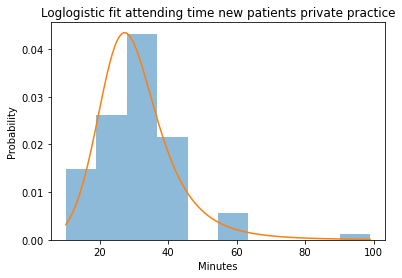

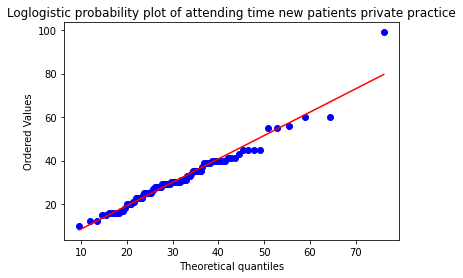

In [81]:
#Fitting the data
c, loc, scale = stats.fisk.fit(att_new_pp)
fitted = stats.fisk(c, loc, scale)
plt.hist(att_new_pp, density=True, alpha=0.5)
x = np.linspace(att_new_pp.min(), att_new_pp.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Loglogistic fit attending time new patients private practice")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(att_new_pp, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Loglogistic probability plot of attending time new patients private practice")

#### Attending Time Return Patients Private Practice

         sumsquare_error         aic         bic  kl_div
triang          0.477720  736.327035 -514.265827     inf
fisk            0.482092  761.443312 -513.363945     inf
lognorm         0.482194  753.043339 -513.342966     inf
gamma           0.482201  751.578487 -513.341513     inf
erlang          0.482201  751.578480 -513.341512     inf


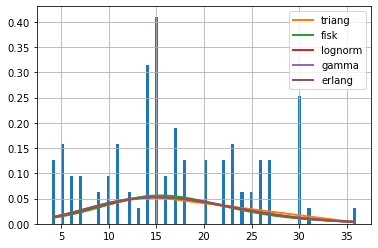

In [82]:
#Fit distribution
fit_dist_att_ret_pp = Fitter(att_return_pp, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_att_ret_pp.fit()
print(fit_dist_att_ret_pp.summary())
plt.show()

In [83]:
fit_dist_att_ret_pp.get_best(method = 'sumsquare_error')

{'triang': {'c': 0.36216706626586403,
  'loc': 0.8844407699745722,
  'scale': 36.21411350051511}}

In [84]:
print(fit_dist_att_ret_pp.fitted_param['triang'])
print(fit_dist_att_ret_pp.fitted_param['fisk'])
print(fit_dist_att_ret_pp.fitted_param['lognorm'])
print(fit_dist_att_ret_pp.fitted_param['gamma'])
print(fit_dist_att_ret_pp.fitted_param['erlang'])

(0.36216706626586403, 0.8844407699745722, 36.21411350051511)
(9.953807774011647, -28.482264797070236, 44.83084660310632)
(0.14206486610115673, -37.52657678988852, 53.92072665018529)
(14.660503776426381, -13.017317923416144, 2.0433616974656186)
(14.66042172026356, -13.017239305020745, 2.043367717220484)


In [85]:
#KS test
triang_att_ret = stats.kstest(att_return_pp, 'triang', args=(0.36216706626586403, 0.8844407699745722, 36.21411350051511))
loglogistic_att_ret = stats.kstest(att_return_pp, 'weibull_min', args=(9.953807774011647, -28.482264797070236, 44.83084660310632))
lognorm_att_ret = stats.kstest(att_return_pp, 'lognorm', args=(0.14206486610115673, -37.52657678988852, 53.92072665018529))
gamma_att_ret = stats.kstest(att_return_pp, 'gamma', args=(14.660503776426381, -13.017317923416144, 2.0433616974656186))
erlang_att_ret = stats.kstest(att_return_pp, 'erlang', args=(14.66042172026356, -13.017239305020745, 2.043367717220484))

print(f'Triangular distribution: {triang_att_ret})')
print(f'Loglogistic distribution: {loglogistic_att_ret})')
print(f'Lognormal distribution: {lognorm_att_ret})')
print(f'Gamma distribution: {gamma_att_ret})')
print(f'Erlang distribution: {erlang_att_ret})')

Triangular distribution: KstestResult(statistic=0.09895282884888656, pvalue=0.2687715327629317))
Loglogistic distribution: KstestResult(statistic=0.2747485464453945, pvalue=4.268363672573598e-07))
Lognormal distribution: KstestResult(statistic=0.09177206110624431, pvalue=0.35327773469010665))
Gamma distribution: KstestResult(statistic=0.09894893358187934, pvalue=0.2688130521510284))
Erlang distribution: KstestResult(statistic=0.09894907798083857, pvalue=0.2688115129292657))


Text(0.5, 1.0, 'Triangular probability plot of attending time returning patients private practice')

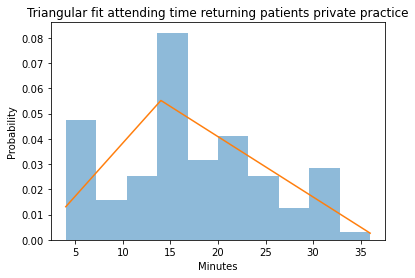

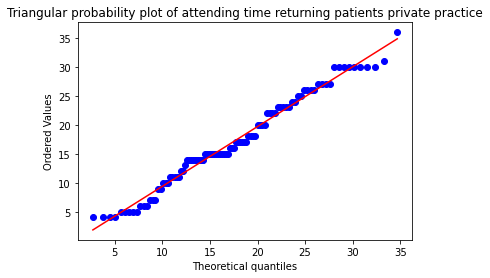

In [86]:
#Fitting the data
c, loc, scale = stats.triang.fit(att_return_pp)
fitted = stats.triang(c, loc, scale)
plt.hist(att_return_pp, density=True, alpha=0.5)
x = np.linspace(att_return_pp.min(), att_return_pp.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Triangular fit attending time returning patients private practice")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(att_return_pp, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Triangular probability plot of attending time returning patients private practice")

### df3 - patient arrival times minus appointment times before and 12 months after policy change

#### Appointment Time Minus Arrival Time Before Policy Change

        sumsquare_error          aic         bic  kl_div
beta           0.007784  1246.867691 -927.667283     inf
norm           0.007952  1297.184349 -934.743171     inf
gamma          0.008132  1302.815633 -927.898750     inf
erlang         0.008144  1299.409145 -927.751523     inf
triang         0.009466  1078.127470 -912.703920     inf


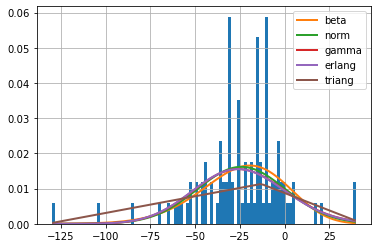

In [87]:
#Fit distribution
fit_dist_before_policy = Fitter(before_policy, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_before_policy.fit()
print(fit_dist_before_policy.summary())
plt.show()

In [88]:
fit_dist_before_policy.get_best(method = 'sumsquare_error')

{'beta': {'a': 5785918.986651861,
  'b': 26.511908748007862,
  'loc': -27518020.596595287,
  'scale': 27518122.55860144}}

In [89]:
print(fit_dist_before_policy.fitted_param['beta'])
print(fit_dist_before_policy.fitted_param['norm'])
print(fit_dist_before_policy.fitted_param['gamma'])
print(fit_dist_before_policy.fitted_param['erlang'])
print(fit_dist_before_policy.fitted_param['triang'])

(5785918.986651861, 26.511908748007862, -27518020.596595287, 27518122.55860144)
(-24.09, 24.64430765917355)
(275.94362748929416, -451.17955428724326, 1.546906238467984)
(295.6194967453831, -466.35801258053243, 1.4944252882347935)
(0.675973847504717, -132.38814613956652, 176.6165164007953)


In [90]:
#KS test
beta_bp = stats.kstest(before_policy, 'beta', args=(5785918.986651861, 26.511908748007862, -27518020.596595287, 27518122.55860144))
norm_bp = stats.kstest(before_policy, 'norm', args=(-24.09, 24.64430765917355))
gamma_bp = stats.kstest(before_policy, 'gamma', args=(275.94362748929416, -451.17955428724326, 1.546906238467984))
erlang_bp = stats.kstest(before_policy, 'erlang', args=(295.6194967453831, -466.35801258053243, 1.4944252882347935))
triang_bp = stats.kstest(before_policy, 'triang', args=(0.675973847504717, -132.38814613956652, 176.6165164007953))

print(f'Beta distribution: {beta_bp})')
print(f'Normal distribution: {norm_bp})')
print(f'Gamma distribution: {gamma_bp})')
print(f'Erlang distribution: {erlang_bp})')
print(f'Logistic distribution: {triang_bp})')

Beta distribution: KstestResult(statistic=0.08991280219129924, pvalue=0.3717971413809443))
Normal distribution: KstestResult(statistic=0.10899188493139514, pvalue=0.17253719492120922))
Gamma distribution: KstestResult(statistic=0.12494550920787953, pvalue=0.08072396148068572))
Erlang distribution: KstestResult(statistic=0.12846509084250743, pvalue=0.06731714915536888))
Logistic distribution: KstestResult(statistic=0.23151539439649887, pvalue=3.395730286228317e-05))


Text(0.5, 1.0, 'Beta probability plot of after policy')

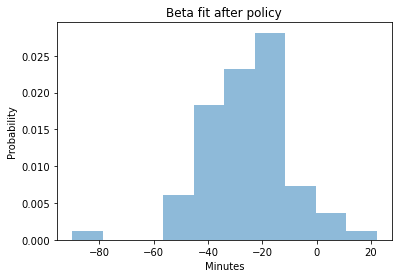

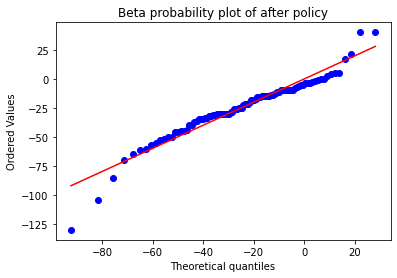

In [91]:
#Fitting the data
a, b, loc, scale = stats.beta.fit(before_policy)
fitted = stats.beta(a, b, loc, scale)
plt.hist(after_policy, density=True, alpha=0.5)
x = np.linspace(after_policy.min(), after_policy.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Beta fit after policy")
plt.xlabel("Minutes")
plt.ylabel("Probability")

stats.probplot(before_policy, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Beta probability plot of after policy")

Text(0.5, 1.0, 'Normal probability plot of after policy')

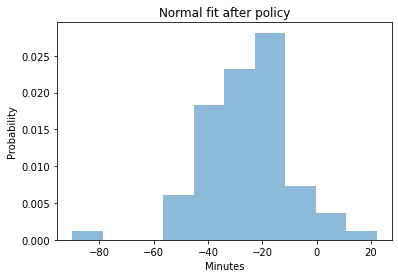

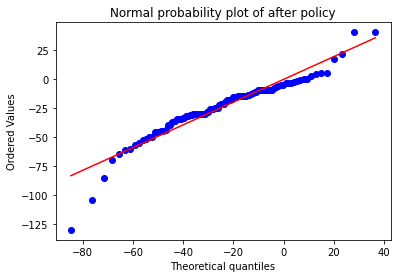

In [92]:
#Fitting the data
loc, scale = stats.norm.fit(before_policy)
fitted = stats.norm(loc, scale)
plt.hist(after_policy, density=True, alpha=0.5)
x = np.linspace(after_policy.min(), after_policy.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Normal fit after policy")
plt.xlabel("Minutes")
plt.ylabel("Probability")

stats.probplot(before_policy, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Normal probability plot of after policy")

#### Appointment Time Minus Arrival Time After Policy Change

In [93]:
after_policy = after_policy[np.logical_not(np.isnan(after_policy))]

        sumsquare_error          aic         bic  kl_div
beta           0.020821  1159.792232 -578.683086     inf
norm           0.020950  1177.390506 -586.813979     inf
gamma          0.021144  1190.284765 -581.850692     inf
erlang         0.021182  1181.705749 -581.717726     inf
triang         0.024092   993.893261 -572.321742     inf


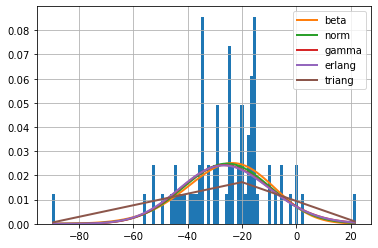

In [94]:
#Fit distribution
fit_dist_after_policy = Fitter(after_policy, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_after_policy.fit()
print(fit_dist_after_policy.summary())
plt.show()

In [95]:
fit_dist_after_policy.get_best(method = 'sumsquare_error')

{'beta': {'a': 3055082.9302649857,
  'b': 63.55580601312435,
  'loc': -6125347.332071472,
  'scale': 6125449.205065026}}

In [96]:
print(fit_dist_after_policy.fitted_param['beta'])
print(fit_dist_after_policy.fitted_param['norm'])
print(fit_dist_after_policy.fitted_param['erlang'])
print(fit_dist_after_policy.fitted_param['gamma'])
print(fit_dist_after_policy.fitted_param['triang'])

(3055082.9302649857, 63.55580601312435, -6125347.332071472, 6125449.205065026)
(-25.54794520547945, 16.02655424547956)
(250.32911863478535, -287.5245427125981, 1.045792025905543)
(208.30225534135252, -263.2423527803701, 1.1414656342155727)
(0.6207945550831853, -92.07220965990683, 116.09671687477838)


In [97]:
#KS test
beta_ap = stats.kstest(after_policy, 'beta', args=(3055082.9302649857, 63.55580601312435, -6125347.332071472, 6125449.205065026))
norm_ap = stats.kstest(after_policy, 'norm', args=(-25.54794520547945, 16.02655424547956))
erlang_ap = stats.kstest(after_policy, 'erlang', args=(250.32911863478535, -287.5245427125981, 1.045792025905543))
gamma_ap = stats.kstest(after_policy, 'gamma', args=(208.30225534135252, -263.2423527803701, 1.1414656342155727))
triang_ap = stats.kstest(after_policy, 'triang', args=(0.6207945550831853, -92.07220965990683, 116.09671687477838))

print(f'Beta distribution: {beta_ap})')
print(f'Norm distribution: {norm_ap})')
print(f'Erlang distribution: {erlang_ap})')
print(f'Gamma distribution: {gamma_ap})')
print(f'Triang distribution: {triang_ap})')

Beta distribution: KstestResult(statistic=0.11126973367201176, pvalue=0.3037239029956454))
Norm distribution: KstestResult(statistic=0.10453456973071251, pvalue=0.37620881964559355))
Erlang distribution: KstestResult(statistic=0.10363198000844187, pvalue=0.38669870120534616))
Gamma distribution: KstestResult(statistic=0.10729141575811019, pvalue=0.34529327106782265))
Triang distribution: KstestResult(statistic=0.18594022145795852, pvalue=0.011069276309943773))


Text(0.5, 1.0, 'Beta probability plot of after policy')

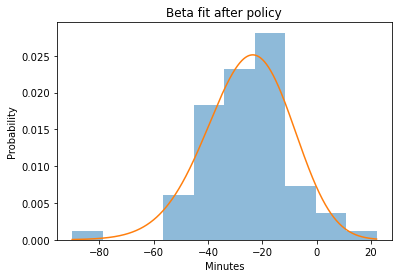

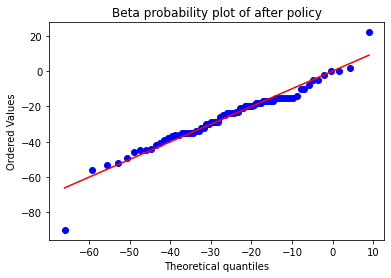

In [98]:
#Fitting the data
a, b, loc, scale = stats.beta.fit(after_policy)
fitted = stats.beta(a, b, loc, scale)
plt.hist(after_policy, density=True, alpha=0.5)
x = np.linspace(after_policy.min(), after_policy.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Beta fit after policy")
plt.xlabel("Minutes")
plt.ylabel("Probability")

stats.probplot(after_policy, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Beta probability plot of after policy")

Text(0.5, 1.0, 'Normal probability plot of after policy')

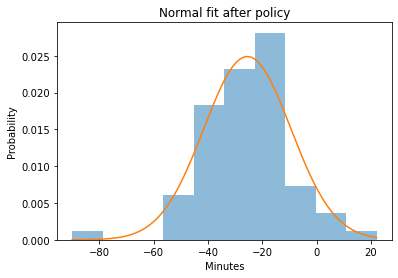

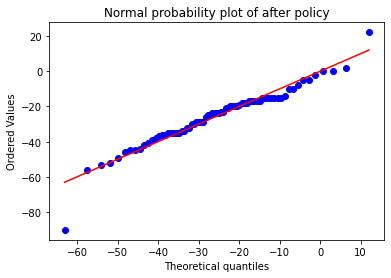

In [99]:
#Fitting the data
loc, scale = stats.norm.fit(after_policy)
fitted = stats.norm(loc, scale)
plt.hist(after_policy, density=True, alpha=0.5)
x = np.linspace(after_policy.min(), after_policy.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Normal fit after policy")
plt.xlabel("Minutes")
plt.ylabel("Probability")

stats.probplot(after_policy, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Normal probability plot of after policy")

### df4 - sample activity times (in minutes) for steps involving resident in AMC for new patients

#### Resident Review

         sumsquare_error         aic         bic  kl_div
fisk            0.153655  992.492900 -567.402621     inf
lognorm         0.154195  985.186827 -567.083258     inf
beta            0.161081  993.847868 -558.596664     inf
erlang          0.161187  990.247779 -563.048074     inf
gamma           0.161187  990.245722 -563.048038     inf


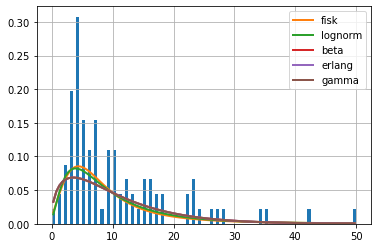

In [100]:
#Fit distribution
fit_dist_rr = Fitter(resident_review, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_rr.fit()
print(fit_dist_rr.summary())
plt.show()

In [101]:
fit_dist_rr.get_best(method = 'sumsquare_error')

{'fisk': {'c': 2.101413884684768,
  'loc': -0.38675445747481785,
  'scale': 7.778184552901763}}

In [102]:
# Print the parameters
print(fit_dist_rr.fitted_param['fisk'])
print(fit_dist_rr.fitted_param['lognorm'])
print(fit_dist_rr.fitted_param['beta'])
print(fit_dist_rr.fitted_param['erlang'])
print(fit_dist_rr.fitted_param['gamma'])

(2.101413884684768, -0.38675445747481785, 7.778184552901763)
(0.7602639724435669, -0.8920761405784056, 8.504055589120263)
(1.533072795905873, 4205988390265.9688, -0.11375241797814231, 28897274919039.316)
(1.5234706188741687, -0.11072679569196742, 6.925132227631668)
(1.5234557201913042, -0.11070252414945103, 6.925205288789453)


In [103]:
# KS test
loglogistic_rr = stats.kstest(resident_review, 'fisk', args = (2.101413884684768, -0.38675445747481785, 7.778184552901763))
lognorm_rr = stats.kstest(resident_review, 'lognorm', args = (0.7602639724435669, -0.8920761405784056, 8.504055589120263))
beta_rr = stats.kstest(resident_review, 'beta', args = (1.533072795905873, 4205988390265.9688, -0.11375241797814231, 28897274919039.316))
erlang_rr = stats.kstest(resident_review, 'erlang', args = (1.5234706188741687, -0.11072679569196742, 6.925132227631668))
gamma_rr = stats.kstest(resident_review, 'gamma', args = (1.5234557201913042, -0.11070252414945103, 6.925205288789453))

print(f'Loglogistic distribution: {loglogistic_rr})')
print(f'Lognorm distribution: {lognorm_rr})')
print(f'Beta distribution: {beta_rr})')
print(f'Erlang distribution: {erlang_rr})')
print(f'Gamma distribution: {gamma_rr})')

Loglogistic distribution: KstestResult(statistic=0.098825989441885, pvalue=0.3154695598826172))
Lognorm distribution: KstestResult(statistic=0.0961437560709259, pvalue=0.3471983406156177))
Beta distribution: KstestResult(statistic=0.1085474140485213, pvalue=0.21753266377381536))
Erlang distribution: KstestResult(statistic=0.10857295009002205, pvalue=0.21730974255898686))
Gamma distribution: KstestResult(statistic=0.10857329029503532, pvalue=0.2173067738547646))


Text(0.5, 1.0, 'Loglogistic probability plot of resident_review')

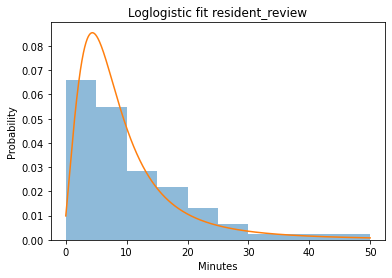

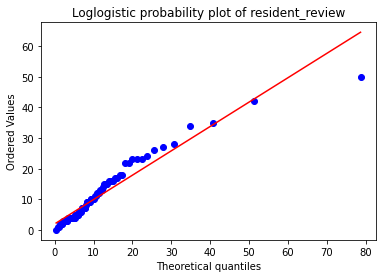

In [104]:
#Fitting the data
c, loc, scale = stats.fisk.fit(resident_review)
fitted = stats.fisk(c, loc, scale)
plt.hist(resident_review, density=True, alpha=0.5)
x = np.linspace(resident_review.min(), resident_review.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Loglogistic fit resident_review")
plt.xlabel("Minutes")
plt.ylabel("Probability")

stats.probplot(resident_review, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Loglogistic probability plot of resident_review")

#### Resident & Patient

             sumsquare_error         aic         bic  kl_div
gamma               0.109311  860.100984 -598.389284     inf
erlang              0.109311  860.100103 -598.389266     inf
beta                0.109656  852.800088 -593.591426     inf
lognorm             0.109741  867.221099 -598.032091     inf
weibull_min         0.109786  855.828815 -597.994720     inf


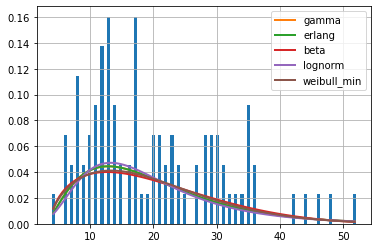

In [105]:
#Fit distribution
fit_dist_rp = Fitter(res_pat, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_rp.fit()
print(fit_dist_rp.summary())
plt.show()

In [106]:
fit_dist_rp.get_best(method = 'sumsquare_error')

{'gamma': {'a': 2.348632264000498,
  'loc': 3.089255321199297,
  'scale': 7.265731055860473}}

In [107]:
print(fit_dist_rp.fitted_param['gamma'])
print(fit_dist_rp.fitted_param['erlang'])
print(fit_dist_rp.fitted_param['beta'])
print(fit_dist_rp.fitted_param['lognorm'])
print(fit_dist_rp.fitted_param['weibull_min'])

(2.348632264000498, 3.089255321199297, 7.265731055860473)
(2.348642357859399, 3.0892442311114996, 7.2657384207732445)
(1.6385806177770093, 5.314702922967781, 3.678676200979937, 70.04962283440237)
(0.5120325690735794, -1.2016700141632013, 18.815727097711225)
(1.5726413050750438, 3.6784601295347796, 18.354883998074783)


In [108]:
# KS test
gamma_rp = stats.kstest(res_pat, 'gamma', args=(2.348632264000498, 3.089255321199297, 7.265731055860473))
erlang_rp = stats.kstest(res_pat, 'erlang', args=(2.348642357859399, 3.0892442311114996, 7.2657384207732445))
beta_rp = stats.kstest(res_pat, 'beta', args=(1.6385806177770093, 5.314702922967781, 3.678676200979937, 70.04962283440237))
lognorm_rp = stats.kstest(res_pat, 'lognorm', args=(0.5120325690735794, -1.2016700141632013, 18.815727097711225))
weibull_rp = stats.kstest(res_pat, 'weibull_min', args=(1.5726413050750438, 3.6784601295347796, 18.354883998074783))
                           

print(f'Gamma distribution: {gamma_rp})')
print(f'Erlang distribution: {erlang_rp})')
print(f'Beta distribution: {beta_rp})')
print(f'Lognorm distribution: {lognorm_rp})')
print(f'Weibull distribution: {weibull_rp})')

Gamma distribution: KstestResult(statistic=0.07331631821592477, pvalue=0.6844684132593759))
Erlang distribution: KstestResult(statistic=0.07331406842268673, pvalue=0.6845045565231842))
Beta distribution: KstestResult(statistic=0.07719603816686055, pvalue=0.6219710592113532))
Lognorm distribution: KstestResult(statistic=0.08204341712297214, pvalue=0.5450677241513212))
Weibull distribution: KstestResult(statistic=0.07405090225269162, pvalue=0.6726525822608832))


Text(0.5, 1.0, 'Gamma probability plot of resident & patient')

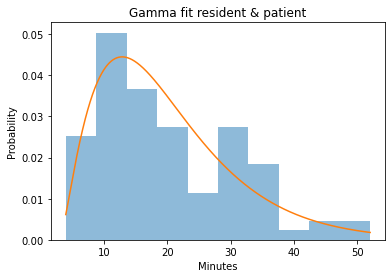

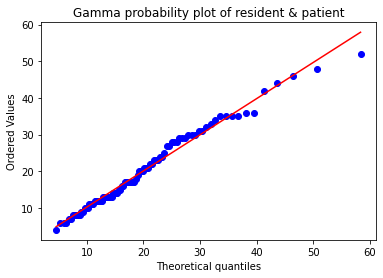

In [109]:
#Fitting the data
shape, loc, scale = stats.gamma.fit(res_pat)
fitted = stats.gamma(shape, loc, scale)
plt.hist(res_pat, density=True, alpha=0.5)
x = np.linspace(res_pat.min(), res_pat.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Gamma fit resident & patient")
plt.xlabel("Minutes")
plt.ylabel("Probability")

stats.probplot(res_pat, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Gamma probability plot of resident & patient")

#### Teach

         sumsquare_error         aic         bic  kl_div
lognorm         0.874971  795.109324 -409.109959     inf
erlang          0.882026  790.497778 -408.379174     inf
gamma           0.882027  790.496420 -408.379148     inf
beta            0.883137  786.561562 -403.753752     inf
triang          0.914117  711.409455 -405.127154     inf


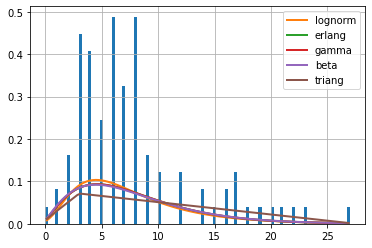

In [110]:
#Fit distribution
fit_dist_teach = Fitter(teach, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_teach.fit()
print(fit_dist_teach.summary())
plt.show()

In [111]:
fit_dist_teach.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.5367853204102808,
  'loc': -1.7254150823177477,
  'scale': 8.291625791059962}}

In [112]:
# Print the parameters
print(fit_dist_teach.fitted_param['lognorm'])
print(fit_dist_teach.fitted_param['erlang'])
print(fit_dist_teach.fitted_param['gamma'])
print(fit_dist_teach.fitted_param['beta'])
print(fit_dist_teach.fitted_param['triang'])

(0.5367853204102808, -1.7254150823177477, 8.291625791059962)
(2.5217439856689516, -0.41458849305911327, 3.280160168093534)
(2.521704920960153, -0.4145714153479915, 3.280206158824196)
(2.392700263850438, 20612783724.91825, -0.3530232725995911, 71227731279.78616)
(0.1229392030389152, -0.44189122683477144, 27.9966933956975)


In [113]:
lognorm_teach = stats.kstest(teach, 'lognorm', args=(0.5367853204102808, -1.7254150823177477, 8.291625791059962))
erlang_teach = stats.kstest(teach, 'erlang', args=(2.5217439856689516, -0.41458849305911327, 3.280160168093534))
gamma_teach = stats.kstest(teach, 'gamma', args=(2.521704920960153, -0.4145714153479915, 3.280206158824196))
beta_teach = stats.kstest(teach, 'beta', args=(2.392700263850438, 20612783724.91825, -0.3530232725995911, 71227731279.78616))
triang_teach = stats.kstest(teach, 'triang', args=(0.1229392030389152, -0.44189122683477144, 27.9966933956975))

print(f'Lognormal distribution: {lognorm_teach})')
print(f'Erlang distribution: {erlang_teach})')
print(f'Gamma distribution: {gamma_teach})')
print(f'Beta distribution: {beta_teach})')
print(f'Triang distribution: {triang_teach})')

Lognormal distribution: KstestResult(statistic=0.10845730090025396, pvalue=0.2183207114898815))
Erlang distribution: KstestResult(statistic=0.13102086209928643, pvalue=0.08019942073771877))
Gamma distribution: KstestResult(statistic=0.13102064482696119, pvalue=0.08020026777729856))
Beta distribution: KstestResult(statistic=0.1331998301829691, pvalue=0.07207528509701555))
Triang distribution: KstestResult(statistic=0.2815165892622002, pvalue=7.147915689093215e-07))


Text(0.5, 1.0, 'Lognormal probability plot of teaching')

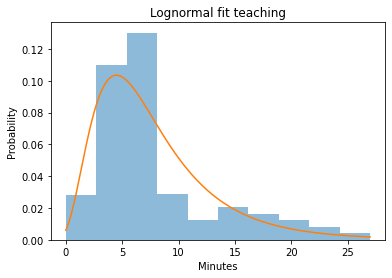

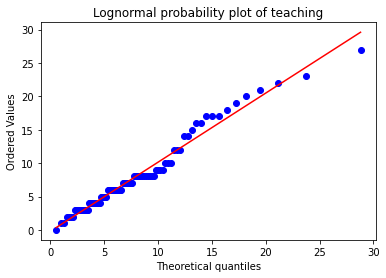

In [114]:
#Fitting the data
shape, loc, scale = stats.lognorm.fit(teach)
fitted = stats.lognorm(shape, loc, scale)
plt.hist(teach, density=True, alpha=0.5)
x = np.linspace(teach.min(), teach.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Lognormal fit teaching")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(teach, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Lognormal probability plot of teaching")

#### Resident & Attending

         sumsquare_error         aic         bic  kl_div
lognorm         0.313812  829.842155 -502.421150     inf
fisk            0.313912  838.181825 -502.392245     inf
gamma           0.314767  825.027595 -502.144501     inf
erlang          0.314767  825.027735 -502.144501     inf
beta            0.314769  826.987303 -497.633063     inf


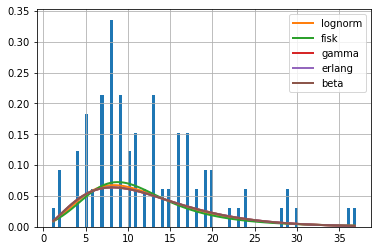

In [115]:
#Fit distribution
fit_dist_ra = Fitter(res_att, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_ra.fit()
print(fit_dist_ra.summary())
plt.show()

In [116]:
fit_dist_ra.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.44396180305067245,
  'loc': -3.737317362450572,
  'scale': 14.678749884157948}}

In [117]:
# Print the parameters
print(fit_dist_ra.fitted_param['lognorm'])
print(fit_dist_ra.fitted_param['fisk'])
print(fit_dist_ra.fitted_param['gamma'])
print(fit_dist_ra.fitted_param['erlang'])
print(fit_dist_ra.fitted_param['beta'])

(0.44396180305067245, -3.737317362450572, 14.678749884157948)
(3.4707723755785174, -2.1854021398317447, 13.018728253773721)
(2.962367545855485, -0.21484510964452086, 4.2754276987264035)
(2.9623675835661585, -0.214852098837145, 4.275426624595885)
(2.9600189134000674, 1453842.5141463298, -0.2123443424199287, 6219693.683638605)


In [118]:
#KS test
lognorm_ra = stats.kstest(res_att, 'lognorm', args=(0.44396180305067245, -3.737317362450572, 14.678749884157948))
loglogistic_ra = stats.kstest(res_att, 'fisk', args=(3.4707723755785174, -2.1854021398317447, 13.018728253773721))
gamma_ra = stats.kstest(res_att, 'gamma', args=(2.962367545855485, -0.21484510964452086, 4.2754276987264035))
erlang_ra = stats.kstest(res_att, 'erlang', args=(2.9623675835661585, -0.214852098837145, 4.275426624595885))
beta_ra = stats.kstest(res_att, 'beta', args=(2.9600189134000674, 1453842.5141463298, -0.2123443424199287, 6219693.683638605))

print(f'Lognormal distribution: {lognorm_ra})')
print(f'Loglogistic distribution: {loglogistic_ra})')
print(f'Gamma distribution: {gamma_ra})')
print(f'Erlang distribution: {erlang_ra})')
print(f'Beta distribution: {beta_ra})')

Lognormal distribution: KstestResult(statistic=0.0758919835084807, pvalue=0.6429729768857189))
Loglogistic distribution: KstestResult(statistic=0.07928398487288557, pvalue=0.5885446856221805))
Gamma distribution: KstestResult(statistic=0.07618415261774864, pvalue=0.6382631551950615))
Erlang distribution: KstestResult(statistic=0.0761835728541912, pvalue=0.6382724993444047))
Beta distribution: KstestResult(statistic=0.07613603036597771, pvalue=0.6390387760753375))


Text(0.5, 1.0, 'Lognormal probability plot of residents & attendents')

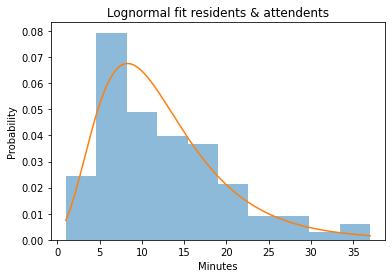

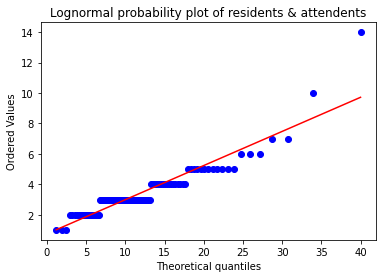

In [119]:
#Fitting the data
shape, loc, scale = stats.lognorm.fit(res_att)
fitted = stats.lognorm(shape, loc, scale)
plt.hist(res_att, density=True, alpha=0.5)
x = np.linspace(res_att.min(), res_att.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Lognormal fit residents & attendents")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(vitals, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Lognormal probability plot of residents & attendents")

## df5 - sample activity times (in minutes) for steps involving resident in AMC for return patients

#### Resident Review

             sumsquare_error          aic         bic  kl_div
weibull_min         0.119214   958.720923 -659.385273     inf
beta                0.121843  1049.779726 -652.598367     inf
lognorm             0.122794  1044.732637 -656.426502     inf
expon               0.125198  1077.853513 -659.092838     inf
gamma               0.135155  1067.540534 -646.834816     inf


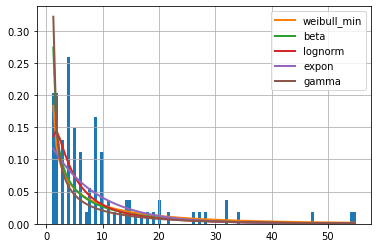

In [120]:
#Fit distribution
fit_dist_rr_ret = Fitter(resident_review_ret, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_rr_ret.fit()
print(fit_dist_rr_ret.summary())
plt.show()

In [121]:
fit_dist_rr_ret.get_best(method = 'sumsquare_error')

{'weibull_min': {'c': 0.7126943293372294,
  'loc': 0.9999999999999998,
  'scale': 10.279498540404777}}

In [122]:
print(fit_dist_rr_ret.fitted_param['weibull_min'])
print(fit_dist_rr_ret.fitted_param['beta'])
print(fit_dist_rr_ret.fitted_param['lognorm'])
print(fit_dist_rr_ret.fitted_param['expon'])
print(fit_dist_rr_ret.fitted_param['gamma'])

(0.7126943293372294, 0.9999999999999998, 10.279498540404777)
(0.49708060131065634, 78.83968526474968, 0.9999999999999999, 1206.84748307261)
(1.1960080549172676, 0.5361862459030278, 4.7009290606529905)
(1.0, 8.3)
(0.3432540386095712, 0.9999999999999999, 19.81737197732969)


In [123]:
#KS test
lognormal_rr_ret = stats.kstest(resident_review_ret, 'weibull_min', args=(0.7126943293372294, 0.9999999999999998, 10.279498540404777))
beta_rr_ret = stats.kstest(resident_review_ret, 'beta', args=(0.49708060131065634, 78.83968526474968, 0.9999999999999999, 1206.84748307261))
lognorm_rr_ret = stats.kstest(resident_review_ret, 'lognorm', args=(1.1960080549172676, 0.5361862459030278, 4.7009290606529905))
expon_rr_ret = stats.kstest(resident_review_ret, 'expon', args=(1.0, 8.3))
gamma_rr_ret = stats.kstest(resident_review_ret, 'gamma', args=(0.3432540386095712, 0.9999999999999999, 19.81737197732969))

print(f'Weibull distribution: {lognormal_rr_ret})')
print(f'Beta distribution: {beta_rr_ret})')
print(f'Lognormal distribution: {lognorm_rr_ret})')
print(f'Exponential distribution: {expon_rr_ret})')
print(f'Gamma distribution: {gamma_rr_ret})')

Weibull distribution: KstestResult(statistic=0.16268010584337733, pvalue=0.008838085124859996))
Beta distribution: KstestResult(statistic=0.1807343210118526, pvalue=0.002491426494642061))
Lognormal distribution: KstestResult(statistic=0.10922985309096084, pvalue=0.1707249211583945))
Exponential distribution: KstestResult(statistic=0.12759170533455577, pvalue=0.07045377787733381))
Gamma distribution: KstestResult(statistic=0.2871296453670083, pvalue=8.59545197031839e-08))


Text(0.5, 1.0, 'Lognormal probability plot of resident review')

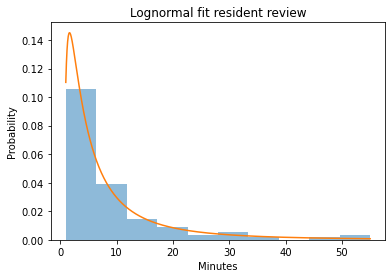

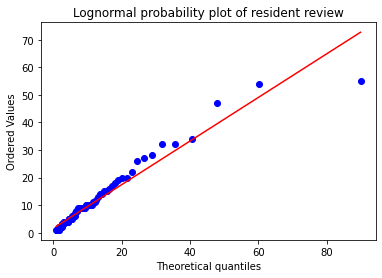

In [124]:
#Fitting the data
shape, loc, scale = stats.lognorm.fit(resident_review_ret)
fitted = stats.lognorm(shape, loc, scale)
plt.hist(resident_review_ret, density=True, alpha=0.5)
x = np.linspace(resident_review_ret.min(), resident_review_ret.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Lognormal fit resident review")
plt.xlabel("Minutes")
plt.ylabel("Probability")

stats.probplot(resident_review_ret, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Lognormal probability plot of resident review")

#### Resident & Patient

        sumsquare_error         aic         bic  kl_div
expon          0.275271  824.677279 -580.306600     inf
erlang         0.275647  829.537579 -575.564981     inf
triang         0.280276  761.355833 -573.899553     inf
fisk           0.286021  841.371420 -571.870429     inf
gamma          0.294988  859.237755 -568.783710     inf


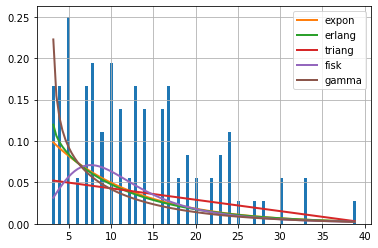

In [125]:
#Fit distribution
fit_dist_rpr = Fitter(res_pat_ret, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_rpr.fit()
print(fit_dist_rpr.summary())
plt.show()

In [126]:
fit_dist_rpr.get_best(method = 'sumsquare_error')

{'expon': {'loc': 3.0, 'scale': 9.99}}

In [127]:
# Print the parameters
print(fit_dist_rpr.fitted_param['expon'])
print(fit_dist_rpr.fitted_param['erlang'])
print(fit_dist_rpr.fitted_param['triang'])
print(fit_dist_rpr.fitted_param['fisk'])
print(fit_dist_rpr.fitted_param['gamma'])

(3.0, 9.99)
(0.9229447138452864, 2.999999999999999, 10.71488535633629)
(2.0622033238434977e-07, 2.999971519234471, 38.14167320954731)
(2.3556823258745117, 0.7959024112870505, 10.008255122589532)
(0.6961211123717359, 2.999999999999999, 12.235737944374371)


In [128]:
#KS test
expon_rpr = stats.kstest(res_pat_ret, 'expon', args=(3.0, 9.99))
erlang_rpr = stats.kstest(res_pat_ret, 'erlang', args=(0.9229447138452864, 2.999999999999999, 10.71488535633629))
triang_rpr = stats.kstest(res_pat_ret, 'triang', args=(2.0622033238434977e-07, 2.999971519234471, 38.14167320954731))
loglogistic_rpr = stats.kstest(res_pat_ret, 'fisk', args=(2.3556823258745117, 0.7959024112870505, 10.008255122589532))
gamma_rpr = stats.kstest(res_pat_ret, 'gamma', args=(0.6961211123717359, 2.999999999999999, 12.235737944374371))

print(f'Exponential distribution: {expon_rpr})')
print(f'Erlang distribution: {erlang_rpr})')
print(f'Triangular distribution: {triang_rpr})')
print(f'Loglgistic distribution: {loglogistic_rpr})')
print(f'Gamma distribution: {gamma_rpr})')

Exponential distribution: KstestResult(statistic=0.10377283323060121, pvalue=0.2162082256045141))
Erlang distribution: KstestResult(statistic=0.12166164247959721, pvalue=0.09519452453967492))
Triangular distribution: KstestResult(statistic=0.16062155914515786, pvalue=0.010123460463042088))
Loglgistic distribution: KstestResult(statistic=0.09525896267426458, pvalue=0.30471483951156475))
Gamma distribution: KstestResult(statistic=0.2143561021698879, pvalue=0.00016384154417404206))


Text(0.5, 1.0, 'Exponential probability plot of residents & patients')

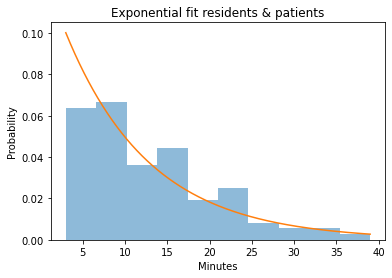

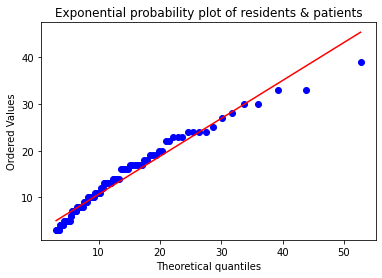

In [129]:
#Fitting the data
loc, scale = stats.expon.fit(res_pat_ret)
fitted = stats.expon(loc, scale)
plt.hist(res_pat_ret, density=True, alpha=0.5)
x = np.linspace(res_pat_ret.min(), res_pat_ret.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Exponential fit residents & patients")
plt.xlabel("Minutes")
plt.ylabel("Probability")

stats.probplot(res_pat_ret, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Exponential probability plot of residents & patients")

#### Teach

         sumsquare_error         aic         bic  kl_div
gamma           2.067487  708.335188 -374.068102     inf
erlang          2.067488  708.332634 -374.068094     inf
lognorm         2.071661  717.807580 -373.866443     inf
fisk            2.079119  723.925195 -373.507077     inf
beta            2.084394  691.205682 -368.648520     inf


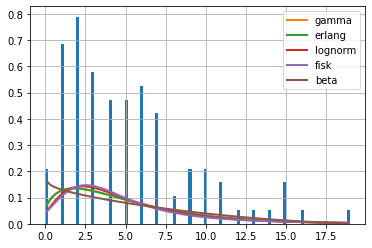

In [130]:
#Fit distribution
fit_dist_teach_ret = Fitter(teach_ret, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_teach_ret.fit()
print(fit_dist_teach_ret.summary())
plt.show()

In [131]:
fit_dist_teach_ret.get_best(method = 'sumsquare_error')

{'gamma': {'a': 1.5871351564913814,
  'loc': -0.1929145208069919,
  'scale': 3.3789747003624746}}

In [132]:
print(fit_dist_teach_ret.fitted_param['gamma'])
print(fit_dist_teach_ret.fitted_param['erlang'])
print(fit_dist_teach_ret.fitted_param['lognorm'])
print(fit_dist_teach_ret.fitted_param['fisk'])
print(fit_dist_teach_ret.fitted_param['beta'])

(1.5871351564913814, -0.1929145208069919, 3.3789747003624746)
(1.5870903188645258, -0.19288085274048197, 3.379073731467665)
(0.6264942967457685, -1.3670450596237487, 5.417640707357039)
(2.407688323954284, -0.8475726215555399, 4.880996663737165)
(0.9403968585560287, 2.721495803869021, -3.294739103789081e-25, 20.616421929637013)


In [133]:
#KS test
gamma_teach_ret = stats.kstest(teach_ret, 'gamma', args=(1.5871351564913814, -0.1929145208069919, 3.3789747003624746))
erlang_teach_ret = stats.kstest(teach_ret, 'erlang', args=(1.5870903188645258, -0.19288085274048197, 3.379073731467665))
lognorm_teach_ret = stats.kstest(teach_ret, 'lognorm', args=(0.6264942967457685, -1.3670450596237487, 5.417640707357039))
loglogistic_teach_ret = stats.kstest(teach_ret, 'fisk', args=(2.407688323954284, -0.8475726215555399, 4.880996663737165))
beta_teach_ret = stats.kstest(teach_ret, 'beta', args=(0.9403968585560287, 2.721495803869021, -3.294739103789081e-25, 20.616421929637013))

print(f'Gamma distribution: {gamma_teach_ret})')
print(f'Erlang distribution: {erlang_teach_ret})')
print(f'Lognorm distribution: {lognorm_teach_ret})')
print(f'Loglogistic distribution: {loglogistic_teach_ret})')
print(f'Beta distribution: {beta_teach_ret})')

Gamma distribution: KstestResult(statistic=0.07778261547578019, pvalue=0.5541662343950935))
Erlang distribution: KstestResult(statistic=0.07778188618182391, pvalue=0.5541781985888492))
Lognorm distribution: KstestResult(statistic=0.09612897062188325, pvalue=0.2946436174508355))
Loglogistic distribution: KstestResult(statistic=0.10540738637087038, pvalue=0.20170515078900517))
Beta distribution: KstestResult(statistic=0.1050414843701693, pvalue=0.20488486896080327))


Text(0.5, 1.0, 'Gamma probability plot of teaching')

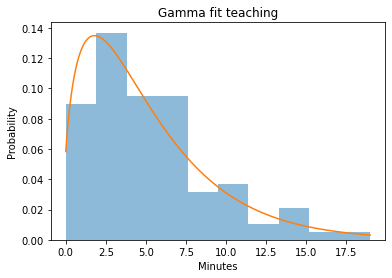

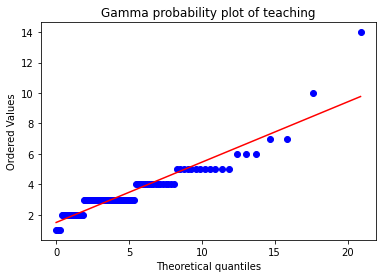

In [134]:
#Fitting the data
shape, loc, scale = stats.gamma.fit(teach_ret)
fitted = stats.gamma(shape, loc, scale)
plt.hist(teach_ret, density=True, alpha=0.5)
x = np.linspace(teach_ret.min(), teach_ret.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Gamma fit teaching")
plt.xlabel("Minutes")
plt.ylabel("Probability")

stats.probplot(vitals, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Gamma probability plot of teaching")

#### Resident & Attending

             sumsquare_error          aic         bic  kl_div
expon               0.129882  1159.592750 -655.419757     inf
beta                0.134230  1270.759223 -642.916185     inf
erlang              0.136218  1266.041106 -646.051530     inf
weibull_min         0.141405  1052.108891 -642.313884     inf
lognorm             0.144265  1111.689989 -640.312006     inf


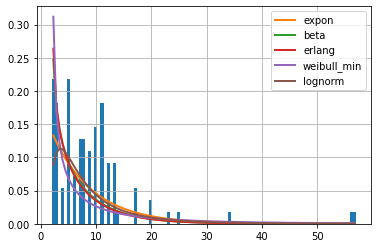

In [135]:
#Fit distribution
fit_dist_res_att_ret = Fitter(res_att_ret, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_res_att_ret.fit()
print(fit_dist_res_att_ret.summary())
plt.show()

In [136]:
fit_dist_res_att_ret.get_best(method = 'sumsquare_error')

{'expon': {'loc': 2.0, 'scale': 7.24}}

In [137]:
print(fit_dist_res_att_ret.fitted_param['expon'])
print(fit_dist_res_att_ret.fitted_param['beta'])
print(fit_dist_res_att_ret.fitted_param['erlang'])
print(fit_dist_res_att_ret.fitted_param['weibull_min'])
print(fit_dist_res_att_ret.fitted_param['lognorm'])

(2.0, 7.24)
(0.7563329832744384, 908.3983251512468, 1.9999999999999998, 6406.534195901632)
(0.7155770505477705, 1.9999999999999991, 7.271269063138863)
(0.5893575391561705, 1.9999999999999998, 5.395931818955972)
(0.8657683291085455, 0.7655659702690436, 5.91152945115388)


In [138]:
#KS test
expon_res_att_ret = stats.kstest(res_att_ret, 'expon', args=(2.0, 7.24))
beta_res_att_ret = stats.kstest(res_att_ret, 'beta', args=(0.7563329832744384, 908.3983251512468, 1.9999999999999998, 6406.534195901632))
erlang_res_att_ret = stats.kstest(res_att_ret, 'erlang', args=(0.7155770505477705, 1.9999999999999991, 7.271269063138863))
weibull_res_att_ret = stats.kstest(res_att_ret, 'weibull_min', args=(0.5893575391561705, 1.9999999999999998, 5.395931818955972))
lognorm_res_att_ret = stats.kstest(res_att_ret, 'lognorm', args=(0.8657683291085455, 0.7655659702690436, 5.91152945115388))

print(f'Exponential distribution: {expon_res_att_ret})')
print(f'Beta distribution: {beta_res_att_ret})')
print(f'Erlang distribution: {erlang_res_att_ret})')
print(f'Weibull distribution: {weibull_res_att_ret})')
print(f'Lognormal distribution: {lognorm_res_att_ret})')

Exponential distribution: KstestResult(statistic=0.12, pvalue=0.10330374901819939))
Beta distribution: KstestResult(statistic=0.22766318420117154, pvalue=4.8880954392691145e-05))
Erlang distribution: KstestResult(statistic=0.24379976556123417, pvalue=1.0183130516509827e-05))
Weibull distribution: KstestResult(statistic=0.2571409568757985, pvalue=2.556402032788072e-06))
Lognormal distribution: KstestResult(statistic=0.11449118956939203, pvalue=0.13437080626798636))


Text(0.5, 1.0, 'Exponential probability plot of vitals')

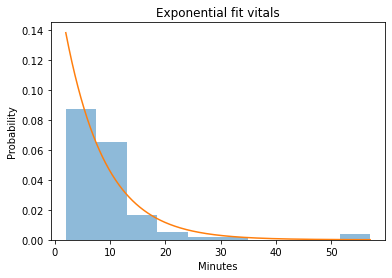

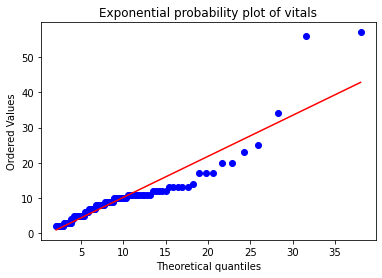

In [139]:
#Fitting the data
loc, scale = stats.expon.fit(res_att_ret)
fitted = stats.expon(loc, scale)
plt.hist(res_att_ret, density=True, alpha=0.5)
x = np.linspace(res_att_ret.min(), res_att_ret.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Exponential fit vitals")
plt.xlabel("Minutes")
plt.ylabel("Probability")

stats.probplot(res_att_ret, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Exponential probability plot of vitals")

## Summary (information necessary for JaamSim input)

### df1 - sample activity times (in minutes) for selected steps common to private practice and AMC

#### Registration - lognormal

In [140]:
df1["Registration"].describe()

count    99.000000
mean      4.333333
std       2.684042
min       1.000000
25%       2.500000
50%       4.000000
75%       5.000000
max      17.000000
Name: Registration, dtype: float64

In [141]:
shape, loc, scale = stats.lognorm.fit(registration)

print(f'Shape:{shape}, Location: {loc}, Scale: {scale}')

Shape:0.5385179590246557, Location: -0.34179772694843824, Scale: 4.048761332128162


In [142]:
stats.lognorm.stats(0.5385179590246557, loc = -0.34179772694843824, scale = 4.048761332128162)

(array(4.33873431), array(7.37029149))

In [143]:
loc, scale = stats.norm.fit(registration)

print(f'Location: {loc}, Scale: {scale}')

Location: 4.333333333333333, Scale: 2.670451859014338


In [144]:
stats.norm.stats(loc = 4.333333333333333, scale = 2.670451859014338)

(array(4.33333333), array(7.13131313))

In [145]:
sqrt(7.13131313)

2.6704518587684745

#### Vitals - loglogistic

In [146]:
df1["Vitals"].describe()

count    99.000000
mean      3.525253
std       1.745802
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max      14.000000
Name: Vitals, dtype: float64

In [147]:
shape, loc, scale = stats.fisk.fit(vitals)

print(f'Shape:{shape}, Location: {loc}, Scale: {scale}')

Shape:4.440911299494791, Location: -0.011404002465611802, Scale: 3.2203618294227185


In [148]:
stats.fisk.stats(4.440911299494791, loc = -0.011404002465611802, scale = 3.2203618294227185)

(array(3.49411423), array(2.56454435))

#### Physicians Assistant - loglogistic

In [149]:
df1["Physicians Assistant"].describe()

count    99.000000
mean     22.626263
std      13.655070
min       5.000000
25%      14.000000
50%      19.000000
75%      26.000000
max      76.000000
Name: Physicians Assistant, dtype: float64

In [150]:
shape, loc, scale = stats.fisk.fit(pa)

print(f'Shape: {shape}, Location: {loc}, Scale: {scale}')

Shape: 2.7860082154208743, Location: 2.702096127818054, Scale: 16.319375665901045


In [151]:
stats.fisk.stats(2.7860082154208743, loc = 2.702096127818054, scale = 16.319375665901045)

(array(23.07210468), array(360.30944548))

#### Check Out - lognormal

In [152]:
df1["Check Out"].describe()

count    99.000000
mean      4.727273
std       3.244519
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      19.000000
Name: Check Out, dtype: float64

In [153]:
shape, loc, scale = stats.lognorm.fit(check_out)

print(f'Shape: {shape}, Location: {loc}, Scale: {scale}')

Shape: 0.5992517770477753, Location: -0.5371618515832648, Scale: 4.424689936688642


In [154]:
stats.lognorm.stats(0.5992517770477753, loc = -0.5371618515832648, scale = 4.424689936688642)

(array(4.75777764), array(12.11294748))

In [155]:
loc, scale = stats.norm.fit(check_out)

print(f'Location: {loc}, Scale: {scale}')

Location: 4.7272727272727275, Scale: 3.22809066317231


In [156]:
stats.norm.stats(loc = 4.7272727272727275, scale = 3.22809066317231)

(array(4.72727273), array(10.42056933))

In [157]:
sqrt(10.42056933)

3.228090663224935

### df2 - sample activity times (in minutes) for steps involving attending in private practice

#### Attending Time New Patients Private Practice - loglogistic

In [158]:
df2["Attending Time New Patients Private Practice"].describe()

count    99.000000
mean     30.969697
std      12.409225
min      10.000000
25%      23.500000
50%      29.000000
75%      36.000000
max      99.000000
Name: Attending Time New Patients Private Practice, dtype: float64

In [159]:
shape, loc, scale = stats.fisk.fit(att_new_pp)

print(f'Shape: {shape}, Location: {loc}, Scale: {scale}')

Shape: 5.702478969865265, Location: -4.6055869057211005, Scale: 33.857358266996386


In [160]:
stats.fisk.stats(5.702478969865265, loc = -4.6055869057211005, scale = 33.857358266996386)

(array(31.0270911), array(146.23342453))

#### Attending Time Return Patients Private Practice - triang

In [161]:
df2["Attending Time Return Patients Private Practice"].describe()

count    99.000000
mean     16.939394
std       7.761520
min       4.000000
25%      11.500000
50%      15.000000
75%      23.000000
max      36.000000
Name: Attending Time Return Patients Private Practice, dtype: float64

In [162]:
shape, loc, scale = stats.triang.fit(att_return_pp)

print(f'Shape: {shape}, Location: {loc}, Scale: {scale}')

Shape: 0.36216706626586403, Location: 0.8844407699745722, Scale: 36.21411350051511


In [163]:
stats.triang.stats(0.36216706626586403, loc = 0.8844407699745722, scale = 36.21411350051511)

(array(17.32766502), array(56.02841999))

In [164]:
statistics.mode(att_return_pp)

15.0

### df3 - patient arrival times minus appointment times before and 12 months after policy change

#### Appointment Time Minus Arrival Time Before Policy Change - normal

In [165]:
df3["Appointment Time Minus Arrival Time Before Policy Change"].describe()

count    100.000000
mean     -24.090000
std       24.768461
min     -130.000000
25%      -34.250000
50%      -22.000000
75%      -10.000000
max       40.000000
Name: Appointment Time Minus Arrival Time Before Policy Change, dtype: float64

In [166]:
a, b, loc, scale = stats.beta.fit(before_policy)

print(f'Shape a: {a}, Shape b: {b}, Location: {loc}, Scale: {scale}')

Shape a: 5785918.986651861, Shape b: 26.511908748007862, Location: -27518020.596595287, Scale: 27518122.55860144


In [167]:
loc, scale = stats.norm.fit(before_policy)

print(f'Location: {loc}, Scale = {scale}')

Location: -24.09, Scale = 24.64430765917355


In [168]:
stats.norm.stats(loc = -24.09, scale = 24.64430765917355)

(array(-24.09), array(607.3419))

#### Appointment Time Minus Arrival Time After Policy Change - norm 

In [169]:
df3["Appointment Time Minus Arrival Time After Policy Change"].describe()

count    73.000000
mean    -25.547945
std      16.137466
min     -90.000000
25%     -35.000000
50%     -24.000000
75%     -17.000000
max      22.000000
Name: Appointment Time Minus Arrival Time After Policy Change, dtype: float64

In [170]:
a, b, loc, scale = stats.beta.fit(after_policy)

print(f'Shape a: {a}, Shape b: {b}, Location: {loc}, Scale: {scale}')

Shape a: 3055082.9302649857, Shape b: 63.55580601312435, Location: -6125347.332071472, Scale: 6125449.205065026


In [171]:
loc, scale = stats.norm.fit(after_policy)

print(f'Location: {loc}, Scale: {scale}')

Location: -25.54794520547945, Scale: 16.02655424547956


In [172]:
stats.norm.stats(loc = -25.54794520547945, scale = 16.02655424547956)

(array(-25.54794521), array(256.85044098))

### df4 - sample activity times (in minutes) for steps involving resident in AMC for new patients¶

#### Resident Review - loglogistic

In [173]:
df4["Resident Review"].describe()

count    91.000000
mean     10.439560
std       9.377525
min       0.000000
25%       4.000000
50%       7.000000
75%      14.500000
max      50.000000
Name: Resident Review, dtype: float64

In [174]:
shape, loc, scale = stats.fisk.fit(resident_review)

print(f'Shape:{shape}, Location: {loc}, Scale: {scale}')

Shape:2.101413884684768, Location: -0.38675445747481785, Scale: 7.778184552901763


In [175]:
stats.fisk.stats(2.101413884684768, loc = -0.38675445747481785, scale = 7.778184552901763)

(array(11.27504517), array(1061.71926214))

#### Resident & Patient - gamma

In [176]:
df4["Resident & Patient"].describe()

count    91.000000
mean     20.153846
std      10.760961
min       4.000000
25%      12.000000
50%      17.000000
75%      28.000000
max      52.000000
Name: Resident & Patient, dtype: float64

In [177]:
shape, loc, scale = stats.gamma.fit(res_pat)

print(f'Shape:{shape}, Location: {loc}, Scale: {scale}')

Shape:2.348632264000498, Location: 3.089255321199297, Scale: 7.265731055860473


In [178]:
stats.gamma.stats(2.348632264000498, loc=3.089255321199297, scale=7.265731055860473)

(array(20.1537857), array(123.98628833))

#### Teach - lognormal

In [179]:
df4["Teach"].describe()

count    91.000000
mean      7.857143
std       5.498629
min       0.000000
25%       4.000000
50%       6.000000
75%       9.000000
max      27.000000
Name: Teach, dtype: float64

In [180]:
shape, loc, scale = stats.lognorm.fit(teach)

print(f'Shape:{shape}, Location: {loc}, Scale: {scale}')

Shape:0.5367853204102808, Location: -1.7254150823177477, Scale: 8.291625791059962


In [181]:
stats.lognorm.stats(0.5367853204102808, loc = -1.7254150823177477, scale = 8.291625791059962)

(array(7.85111483), array(30.62579732))

In [182]:
loc, scale = stats.norm.fit(teach)

print(f'Location: {loc}, Scale: {scale}')

Location: 7.857142857142857, Scale: 5.468333270733563


In [183]:
stats.norm.stats(loc = 7.857142857142857, scale=5.468333270733563)

(array(7.85714286), array(29.90266876))

In [184]:
sqrt(29.90266876)

5.4683332707507875

#### Resident & Attending - lognormal

In [185]:
df4["Resident & Attending"].describe()

count    91.000000
mean     12.450549
std       7.436044
min       1.000000
25%       7.500000
50%      11.000000
75%      16.500000
max      37.000000
Name: Resident & Attending, dtype: float64

In [186]:
shape, loc, scale = stats.lognorm.fit(res_att)

print(f'Shape:{shape}, Location: {loc}, Scale: {scale}')

Shape:0.44396180305067245, Location: -3.737317362450572, Scale: 14.678749884157948


In [187]:
stats.lognorm.stats(0.44396180305067245, loc = -3.737317362450572, scale = 14.678749884157948)

(array(12.46172137), array(57.17058643))

In [188]:
loc, scale = stats.norm.fit(res_att)

print(f'Location: {loc}, Scale: {scale}')

Location: 12.45054945054945, Scale: 7.395073703670538


In [189]:
stats.norm.stats(loc = 12.45054945054945, scale = 7.395073703670538)

(array(12.45054945), array(54.68711508))

In [190]:
sqrt(54.68711508)

7.395073703486666

### df5 - sample activity times (in minutes) for steps involving resident in AMC for return patients

#### Resident Review - lognormal

In [191]:
df5["Resident Review"].describe()

count    100.000000
mean       9.300000
std       10.604459
min        1.000000
25%        3.000000
50%        5.000000
75%       10.000000
max       55.000000
Name: Resident Review, dtype: float64

In [192]:
shape, loc, scale = stats.lognorm.fit(resident_review_ret)

print(f'Shape:{shape}, Location: {loc}, Scale: {scale}')

Shape:1.1960080549172676, Location: 0.5361862459030278, Scale: 4.7009290606529905


In [193]:
stats.lognorm.stats(1.1960080549172676, loc = 0.5361862459030278, scale=4.7009290606529905)

(array(10.14785442), array(293.82954066))

In [194]:
loc, scale = stats.norm.fit(resident_review_ret)

print(f'Location: {loc}, Scale: {scale}')

Location: 9.3, Scale: 10.551303237041385


In [195]:
stats.norm.stats(loc = 9.3, scale = 10.551303237041385)

(array(9.3), array(111.33))

In [196]:
sqrt(111.33)

10.551303237041385

#### Resident & Patient - expnential

In [197]:
df5["Resident & Patient"].describe()

count    100.000000
mean      12.990000
std        7.956314
min        3.000000
25%        7.000000
50%       11.000000
75%       17.000000
max       39.000000
Name: Resident & Patient, dtype: float64

In [198]:
loc, scale = stats.expon.fit(res_pat_ret)

print(f'Location: {loc}, Scale: {scale}')

Location: 3.0, Scale: 9.99


In [199]:
stats.expon.stats(loc=3.0, scale=9.99)

(array(12.99), array(99.8001))

#### Teach - gamma

In [200]:
df5["Teach"].describe()

count    100.000000
mean       5.170000
std        4.065263
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       19.000000
Name: Teach, dtype: float64

In [201]:
shape, loc, scale = stats.gamma.fit(teach_ret)

print(f'Shape: {shape}, Location: {loc}, Scale: {scale}')

Shape: 1.5871351564913814, Location: -0.1929145208069919, Scale: 3.3789747003624746


In [202]:
stats.gamma.stats(1.5871351564913814, loc = -0.1929145208069919, scale = 3.3789747003624746)

(array(5.16997502), array(18.12106808))

#### Resident & Attending - exponential

In [203]:
df5["Resident & Attending"].describe()

count    100.000000
mean       9.240000
std        8.705182
min        2.000000
25%        4.750000
50%        8.000000
75%       11.000000
max       57.000000
Name: Resident & Attending, dtype: float64

In [204]:
loc, scale = stats.expon.fit(teach_ret)

print(f'Location: {loc}, Scale: {scale}')

Location: 0.0, Scale: 5.17


In [205]:
stats.expon.stats(loc = 0.0, scale = 5.17)

(array(5.17), array(26.7289))

## Improved models

### Pre-processing of patients

#### Resident Review New - loglogistic 

In [206]:
df4.insert(loc=5,
          column='Resident Review New',
          value=df4["Resident Review"]/2)

In [207]:
df4.insert(loc=6,
          column='Teach_new',
          value=df4["Teach"]/2)

In [208]:
print(df4)

    Record  Resident Review  Resident & Patient  Teach  Resident & Attending  \
0        1              1.0                27.0    3.0                  14.0   
1        2              5.0                17.0    8.0                   5.0   
2        3              7.0                 9.0    3.0                   7.0   
3        4              0.0                17.0    2.0                   1.0   
4        5              6.0                27.0    7.0                   9.0   
..     ...              ...                 ...    ...                   ...   
86      87             35.0                23.0    4.0                  20.0   
87      88              4.0                 8.0    8.0                  20.0   
88      89              3.0                13.0    8.0                  20.0   
89      90              3.0                29.0    8.0                   6.0   
90      91              4.0                20.0    8.0                  16.0   

    Resident Review New  Teach_new  
0 

In [209]:
resident_review_new = df4["Resident Review New"].values

         sumsquare_error         aic         bic  kl_div
fisk            0.614621  853.858907 -441.249777     inf
lognorm         0.616783  846.555524 -440.930320     inf
beta            0.644326  855.218420 -432.443877     inf
erlang          0.644747  851.620619 -436.895346     inf
gamma           0.644748  851.615389 -436.895204     inf


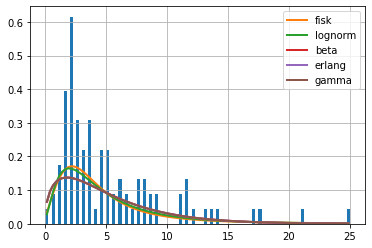

In [210]:
#Fit distribution
fit_dist_resident_review_new = Fitter(resident_review_new, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_resident_review_new.fit()
print(fit_dist_resident_review_new.summary())
plt.show()

In [211]:
fit_dist_resident_review_new.get_best(method = 'sumsquare_error')

{'fisk': {'c': 2.1013804175904824,
  'loc': -0.193362250475537,
  'scale': 3.8891043549841724}}

In [212]:
# Print the parameters
print(fit_dist_resident_review_new.fitted_param['fisk'])
print(fit_dist_resident_review_new.fitted_param['lognorm'])
print(fit_dist_resident_review_new.fitted_param['beta'])
print(fit_dist_resident_review_new.fitted_param['erlang'])
print(fit_dist_resident_review_new.fitted_param['gamma'])

(2.1013804175904824, -0.193362250475537, 3.8891043549841724)
(0.7602693404800869, -0.44605420513926497, 4.252028806561186)
(1.5330728756282483, 5181973509106.596, -0.056876320664588365, 17801394015095.57)
(1.523475938408893, -0.05536349221408117, 3.4625391970927244)
(1.5234529132268264, -0.05535521281566892, 3.462615450368541)


In [213]:
fisk_resident_review_new = stats.kstest(resident_review_new, 'fisk', args=(2.1013804175904824, -0.193362250475537, 3.8891043549841724))
lognorm_resident_review_new = stats.kstest(resident_review_new, 'lognorm', args=(0.7602693404800869, -0.44605420513926497, 4.252028806561186))
beta_resident_review_new = stats.kstest(resident_review_new, 'beta', args=(1.5330728756282483, 5181973509106.596, -0.056876320664588365, 17801394015095.57))
erlang_resident_review_new = stats.kstest(resident_review_new, 'erlang', args=(1.523475938408893, -0.05536349221408117, 3.4625391970927244))
gamma_resident_review_new = stats.kstest(resident_review_new, 'gamma', args=(1.5234529132268264, -0.05535521281566892, 3.462615450368541))


print(f'Loglogistic distribution: {fisk_resident_review_new})')
print(f'Lognormal distribution: {lognorm_resident_review_new})')
print(f'Beta distribution: {beta_resident_review_new})')
print(f'Erlang distribution: {erlang_resident_review_new})')
print(f'Gamma distribution: {gamma_resident_review_new})')

Loglogistic distribution: KstestResult(statistic=0.09882629283070293, pvalue=0.31546608696711487))
Lognormal distribution: KstestResult(statistic=0.09613962241117813, pvalue=0.3472488151493912))
Beta distribution: KstestResult(statistic=0.10868466865305937, pvalue=0.21633651899625034))
Erlang distribution: KstestResult(statistic=0.10857164568926458, pvalue=0.217321125334504))
Gamma distribution: KstestResult(statistic=0.10857333605212272, pvalue=0.21730637457064775))


Text(0.5, 1.0, 'Loglogistic probability plot of resident review new')

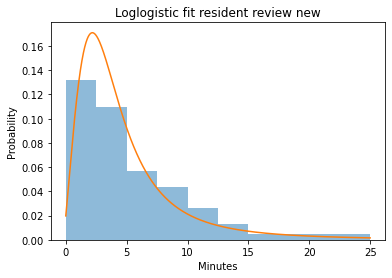

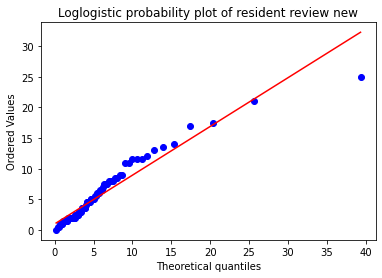

In [214]:
#Fitting the data
shape, loc, scale = stats.fisk.fit(resident_review_new)
fitted = stats.fisk(shape, loc, scale)
plt.hist(resident_review_new, density=True, alpha=0.5)
x = np.linspace(resident_review_new.min(), resident_review_new.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Loglogistic fit resident review new")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(resident_review_new, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Loglogistic probability plot of resident review new")

In [215]:
df4["Resident Review New"].describe()

count    91.000000
mean      5.219780
std       4.688762
min       0.000000
25%       2.000000
50%       3.500000
75%       7.250000
max      25.000000
Name: Resident Review New, dtype: float64

In [216]:
shape, loc, scale = stats.fisk.fit(resident_review_new)

print(f'Shape: {shape}, Location: {loc}, Scale: {scale}')

Shape: 2.1013804175904824, Location: -0.193362250475537, Scale: 3.8891043549841724


#### Teach New - loglogistic

In [217]:
teach_new = df4["Teach_new"].values

         sumsquare_error         aic         bic  kl_div
fisk            3.485999  668.639842 -283.318973     inf
lognorm         3.499887  656.477373 -282.957150     inf
gamma           3.528106  651.866984 -282.226361     inf
erlang          3.528107  651.865924 -282.226342     inf
beta            3.532550  647.932126 -277.600965     inf


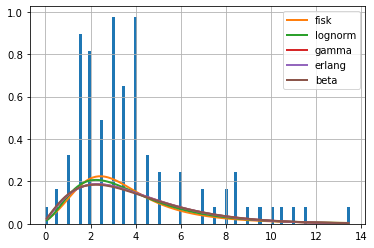

In [218]:
#Fit distribution
fit_dist_teach_new = Fitter(teach_new, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_teach_new.fit()
print(fit_dist_teach_new.summary())
plt.show()

In [219]:
fit_dist_teach_new.get_best(method = 'sumsquare_error')

{'fisk': {'c': 2.9721824868338134,
  'loc': -0.5028836715472698,
  'scale': 3.7182729342419796}}

In [220]:
print(fit_dist_teach_new.fitted_param['fisk'])
print(fit_dist_teach_new.fitted_param['lognorm'])
print(fit_dist_teach_new.fitted_param['gamma'])
print(fit_dist_teach_new.fitted_param['erlang'])
print(fit_dist_teach_new.fitted_param['beta'])

(2.9721824868338134, -0.5028836715472698, 3.7182729342419796)
(0.5367956323539818, -0.8626650055240963, 4.145771138153712)
(2.521704920960153, -0.20728570767399576, 1.640103079412098)
(2.5217275925285585, -0.20729742225064632, 1.6400994395947373)
(2.392700263850438, 20612783724.91825, -0.17651163629979555, 35613865639.89308)


In [221]:
#KS test
loglogistic_teach_new = stats.kstest(teach_new, 'fisk', args=(2.9721824868338134, -0.5028836715472698, 3.7182729342419796))
lognorm_teach_new = stats.kstest(teach_new, 'lognorm', args=(0.5367956323539818, -0.8626650055240963, 4.145771138153712))
erlang_teach_new = stats.kstest(teach_new, 'gamma', args=(2.521704920960153, -0.20728570767399576, 1.640103079412098))
gamma_teach_new = stats.kstest(teach_new, 'erlang', args=(2.5217275925285585, -0.20729742225064632, 1.6400994395947373))
beta_teach_new = stats.kstest(teach_new, 'beta', args=(2.392700263850438, 20612783724.91825, -0.17651163629979555, 35613865639.89308))

print(f'Loglogistic distribution: {loglogistic_teach_new})')
print(f'Lognormal distribution: {lognorm_teach_new})')
print(f'Gamma distribution: {erlang_teach_new})')
print(f'Erlang distribution: {gamma_teach_new})')
print(f'Weibull distribution: {beta_teach_new})')

Loglogistic distribution: KstestResult(statistic=0.08673073332722203, pvalue=0.4741007443884888))
Lognormal distribution: KstestResult(statistic=0.10845853759907964, pvalue=0.2183098817815602))
Gamma distribution: KstestResult(statistic=0.13102064482696119, pvalue=0.08020026777729856))
Erlang distribution: KstestResult(statistic=0.13102341292737496, pvalue=0.08018947685783355))
Weibull distribution: KstestResult(statistic=0.1331998301829691, pvalue=0.07207528509701555))


Text(0.5, 1.0, 'Loglogistic probability plot of teaching new')

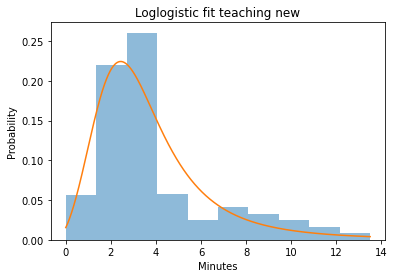

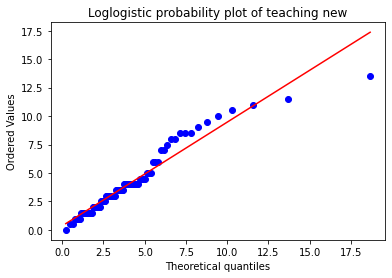

In [222]:
#Fitting the data
c, loc, scale = stats.fisk.fit(teach_new)
fitted = stats.fisk(c, loc, scale)
plt.hist(teach_new, density=True, alpha=0.5)
x = np.linspace(teach_new.min(), teach_new.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Loglogistic fit teaching new")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(teach_new, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Loglogistic probability plot of teaching new")

In [223]:
df4["Teach_new"].describe()

count    91.000000
mean      3.928571
std       2.749314
min       0.000000
25%       2.000000
50%       3.000000
75%       4.500000
max      13.500000
Name: Teach_new, dtype: float64

In [224]:
shape, loc, scale = stats.fisk.fit(teach_new)

print(f'Shape: {shape}, Location: {loc}, Scale: {scale}')

Shape: 2.9721824868338134, Location: -0.5028836715472698, Scale: 3.7182729342419796


#### Resident Review Return - loglogistic

In [225]:
df5.insert(loc=5,
          column='Resident Review New',
          value=df5["Resident Review"]/2)

In [226]:
df5.insert(loc=6,
          column='Teach New',
          value=df5["Teach"]/2)

In [227]:
print(df5)

    Record  Resident Review  Resident & Patient  Teach  Resident & Attending  \
0        1              1.0                30.0   15.0                  11.0   
1        2             11.0                19.0    2.0                  11.0   
2        3             17.0                39.0    2.0                  57.0   
3        4              9.0                23.0    0.0                  10.0   
4        5              4.0                17.0    5.0                   3.0   
..     ...              ...                 ...    ...                   ...   
95      96              5.0                25.0    4.0                   5.0   
96      97              5.0                 8.0    3.0                   9.0   
97      98              2.0                 8.0   10.0                   3.0   
98      99              2.0                 3.0    6.0                   7.0   
99     100              6.0                 8.0   14.0                  10.0   

    Resident Review New  Teach New  
0 

In [228]:
resident_review_new_ret = df5["Resident Review New"].values

             sumsquare_error         aic         bic  kl_div
erlang              0.468213  925.787345 -522.584608     inf
weibull_min         0.476855  820.091487 -520.755837     inf
fisk                0.484936  899.687960 -519.075441     inf
beta                0.487373  911.150290 -513.968930     inf
lognorm             0.491172  906.103255 -517.797570     inf


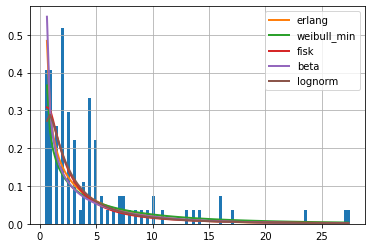

In [229]:
#Fit distribution
fit_dist_rnr = Fitter(resident_review_new_ret, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_rnr.fit()
print(fit_dist_rnr.summary())
plt.show()

In [230]:
fit_dist_rnr.get_best(method = 'sumsquare_error')

{'erlang': {'a': 0.6098125805437993,
  'loc': 0.49999999999999994,
  'scale': 6.08990908905744}}

In [231]:
print(fit_dist_rnr.fitted_param['erlang'])
print(fit_dist_rnr.fitted_param['weibull_min'])
print(fit_dist_rnr.fitted_param['fisk'])
print(fit_dist_rnr.fitted_param['beta'])
print(fit_dist_rnr.fitted_param['lognorm'])

(0.6098125805437993, 0.49999999999999994, 6.08990908905744)
(0.7126943293372294, 0.4999999999999999, 5.139749270202389)
(1.1924523379451246, 0.4439953914737804, 2.1767145133540406)
(0.49708060131065634, 78.83968526474968, 0.49999999999999994, 603.423741536305)
(1.1960259609182962, 0.268100816171364, 2.350423084715866)


In [232]:
#KS test
erlang_rnr = stats.kstest(resident_review_new_ret, 'erlang', args=(0.6098125805437993, 0.49999999999999994, 6.08990908905744))
weibull_rnr = stats.kstest(resident_review_new_ret, 'weibull_min', args=(0.7126943293372294, 0.4999999999999999, 5.139749270202389))
fisk_rnr = stats.kstest(resident_review_new_ret, 'fisk', args=(1.1924523379451246, 0.4439953914737804, 2.1767145133540406))
beta_rnr = stats.kstest(resident_review_new_ret, 'beta', args=(0.49708060131065634, 78.83968526474968, 0.49999999999999994, 603.423741536305))
lognorm_rnr = stats.kstest(resident_review_new_ret, 'lognorm', args=(1.1960259609182962, 0.268100816171364, 2.350423084715866))

print(f'Erlang distribution: {erlang_rnr})')
print(f'Weibull distribution: {weibull_rnr})')
print(f'Fisk distribution: {fisk_rnr})')
print(f'Beta distribution: {beta_rnr})')
print(f'Lognorm distribution: {lognorm_rnr})')

Erlang distribution: KstestResult(statistic=0.14442287721302427, pvalue=0.02772485911407399))
Weibull distribution: KstestResult(statistic=0.16268010584337733, pvalue=0.008838085124859996))
Fisk distribution: KstestResult(statistic=0.11124012352092622, pvalue=0.15600919756832107))
Beta distribution: KstestResult(statistic=0.1807343210118526, pvalue=0.002491426494642061))
Lognorm distribution: KstestResult(statistic=0.10923558808660067, pvalue=0.17068143176110226))


Text(0.5, 1.0, 'Loglogistisc probability plot of check out')

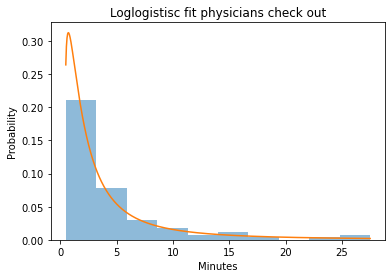

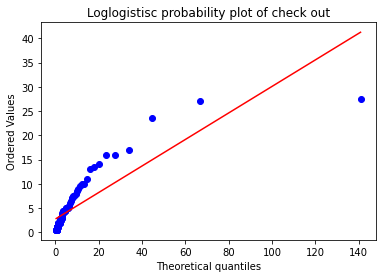

In [233]:
#Fitting the data
shape, loc, scale = stats.fisk.fit(resident_review_new_ret)
fitted = stats.fisk(shape, loc, scale)
plt.hist(resident_review_new_ret, density=True, alpha=0.5)
x = np.linspace(resident_review_new_ret.min(), resident_review_new_ret.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Loglogistisc fit physicians check out")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(resident_review_new_ret, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Loglogistisc probability plot of check out")

Text(0.5, 1.0, 'Lognormal probability plot of check out')

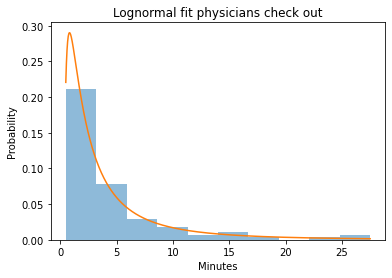

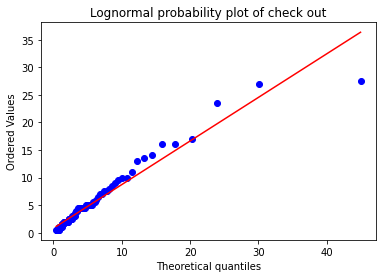

In [234]:
#Fitting the data
shape, loc, scale = stats.lognorm.fit(resident_review_new_ret)
fitted = stats.lognorm(shape, loc, scale)
plt.hist(resident_review_new_ret, density=True, alpha=0.5)
x = np.linspace(resident_review_new_ret.min(), resident_review_new_ret.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Lognormal fit physicians check out")
plt.xlabel("Minutes")
plt.ylabel("Probability")


stats.probplot(resident_review_new_ret, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Lognormal probability plot of check out")

In [235]:
df5["Resident Review New"].describe()

count    100.000000
mean       4.650000
std        5.302229
min        0.500000
25%        1.500000
50%        2.500000
75%        5.000000
max       27.500000
Name: Resident Review New, dtype: float64

In [236]:
shape, loc, scale = stats.lognorm.fit(resident_review_new_ret)

print(f'Shape: {shape}, Location: {loc}, Scale: {scale}')

Shape: 1.1960259609182962, Location: 0.268100816171364, Scale: 2.350423084715866


In [237]:
loc, scale = stats.norm.fit(resident_review_new_ret)

print(f'Location: {loc}, Scale: {scale}')

Location: 4.65, Scale: 5.275651618520692


In [238]:
stats.norm.stats(loc = 4.65, scale = 5.275651618520692)

(array(4.65), array(27.8325))

In [239]:
sqrt(27.8325)

5.275651618520692

#### Teach Return - erlang

In [240]:
teach_nr = df5["Teach New"].values

             sumsquare_error         aic         bic  kl_div
erlang              8.269950  569.702757 -235.438657     inf
gamma               8.269950  569.706781 -235.438656     inf
weibull_min         8.273377  568.589380 -235.397232     inf
lognorm             8.286643  579.180308 -235.237009     inf
fisk                8.316479  585.298275 -234.877609     inf


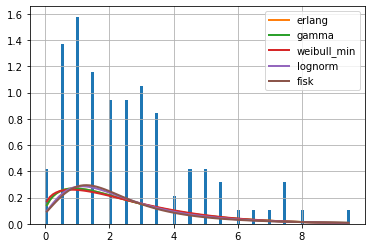

In [241]:
#Fit distribution
fit_dist_teach_nr = Fitter(teach_nr, 
                  distributions = ["uniform",
                                  "triang",
                                  "norm",
                                  "expon",
                                  "erlang",
                                  "gamma",
                                  "beta",
                                  "weibull_min",
                                  "lognorm",
                                  "fisk",
                                  ])
fit_dist_teach_nr.fit()
print(fit_dist_teach_nr.summary())
plt.show()

In [242]:
fit_dist_teach_nr.get_best(method = 'sumsquare_error')

{'erlang': {'a': 1.5871368153196794,
  'loc': -0.09644117244683492,
  'scale': 1.6894990617640744}}

In [243]:
print(fit_dist_teach_nr.fitted_param['erlang'])
print(fit_dist_teach_nr.fitted_param['gamma'])
print(fit_dist_teach_nr.fitted_param['weibull_min'])
print(fit_dist_teach_nr.fitted_param['lognorm'])
print(fit_dist_teach_nr.fitted_param['fisk'])

(1.5871368153196794, -0.09644117244683492, 1.6894990617640744)
(1.5871678922911223, -0.09644905471706508, 1.689448335888474)
(1.2798991893130238, -0.04711389542351059, 2.8349090296120556)
(0.6264845981212095, -0.6835579693587583, 2.70884282382812)
(2.4077431554727644, -0.4238230375357478, 2.440519992688009)


In [244]:
#KS test
erlang_teach_nr = stats.kstest(teach_nr, 'erlang', args=(1.5871368153196794, -0.09644117244683492, 1.6894990617640744))
lognorm_teach_nr = stats.kstest(teach_nr, 'gamma', args=(1.5871678922911223, -0.09644905471706508, 1.689448335888474))
weibull_teach_nr = stats.kstest(teach_nr, 'weibull_min', args=(1.2798991893130238, -0.04711389542351059, 2.8349090296120556))
lognorm_teach_nr = stats.kstest(teach_nr, 'lognorm', args=(0.6264845981212095, -0.6835579693587583, 2.70884282382812))
fisk_teach_nr = stats.kstest(teach_nr, 'fisk', args=(2.4077431554727644, -0.4238230375357478, 2.440519992688009))

print(f'Erlang distribution: {erlang_teach_nr})')
print(f'Lognormal distribution: {lognorm_teach_nr})')
print(f'Weibull distribution: {weibull_teach_nr})')
print(f'Lognormal distribution: {lognorm_teach_nr})')
print(f'Loglogistic distribution: {fisk_teach_nr})')

Erlang distribution: KstestResult(statistic=0.07778950150259151, pvalue=0.5540532721142425))
Lognormal distribution: KstestResult(statistic=0.09612639649940918, pvalue=0.29467306567625257))
Weibull distribution: KstestResult(statistic=0.07615981465935467, pvalue=0.580982459769265))
Lognormal distribution: KstestResult(statistic=0.09612639649940918, pvalue=0.29467306567625257))
Loglogistic distribution: KstestResult(statistic=0.10540550045632227, pvalue=0.201721441501549))


Text(0.5, 1.0, 'Erlang probability plot of attending time new patients private practice')

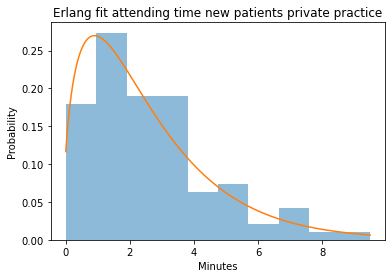

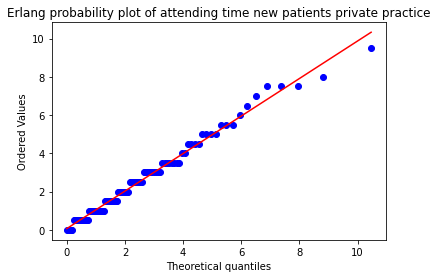

In [245]:
#Fitting the data
c, loc, scale = stats.erlang.fit(teach_nr)
fitted = stats.erlang(c, loc, scale)
plt.hist(teach_nr, density=True, alpha=0.5)
x = np.linspace(teach_nr.min(), teach_nr.max(), 1000)
plt.plot(x, fitted.pdf(x))
plt.title("Erlang fit attending time new patients private practice")
plt.xlabel("Minutes")
plt.ylabel("Probability")

stats.probplot(teach_nr, dist=fitted,
plot=plt.figure().add_subplot(111))
plt.title("Erlang probability plot of attending time new patients private practice")

In [246]:
df5["Teach New"].describe()

count    100.000000
mean       2.585000
std        2.032632
min        0.000000
25%        1.000000
50%        2.000000
75%        3.500000
max        9.500000
Name: Teach New, dtype: float64

In [247]:
shape, loc, scale = stats.erlang.fit(teach_nr)

print(f'Shape: {shape}, Location: {loc}, Scale: {scale}')

Shape: 1.5871368153196794, Location: -0.09644117244683492, Scale: 1.6894990617640744


In [248]:
stats.erlang.stats(1.6894990617640744, loc = -0.09644117244683492, scale = 1.6894990617640744)

(array(2.75796591), array(4.82251808))